In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import the MLPClassifier from neural_network from sklearn
from sklearn.neural_network import MLPClassifier
#import the pipeline from sklearn
from imblearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

In [2]:
estimators = []

ac = pd.read_csv('accidents_preprocessed.csv')
ac = ac.drop(columns=['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude'])
ac.head()

,accident_index,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2020010278554,2,1,11,2,1220.0,5,6,20,0,...,0,0,3,1,5,113,1,4,-1,-1
1,2020010278556,2,1,11,4,710.0,5,6,30,3,...,-1,-1,-1,1,4,125,1,4,1,1
2,2020010278558,2,1,11,2,1171.0,3,2,20,3,...,0,0,2,1,7,125,1,0,3,1
3,2020010278559,2,1,11,2,1153.0,5,6,30,0,...,0,0,4,1,7,124,1,7,6,1
4,2020010278564,2,1,11,2,994.0,3,-1,20,5,...,-1,-1,1,2,5,125,1,6,7,1


### Preprocess Target class casualty_severity
#### -Note:  Fatal and Serious together in one class and slight in the other

In [3]:

ac['casualty_severity'] = ac['casualty_severity'].replace(2, 1)
ac['casualty_severity'] = ac['casualty_severity'].replace(3, 0)

ac[ac.casualty_severity == 1]

,accident_index,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2020010278554,2,1,11,2,1220.0,5,6,20,0,...,0,0,3,1,5,113,1,4,-1,-1
1,2020010278556,2,1,11,4,710.0,5,6,30,3,...,-1,-1,-1,1,4,125,1,4,1,1
12,2020010278586,2,1,11,3,165.0,3,6,20,-1,...,0,0,1,1,7,1598,1,16,3,1
13,2020010278589,2,1,11,3,287.0,3,6,30,6,...,0,0,1,1,7,109,1,5,2,1
14,2020010278598,2,1,11,3,545.0,3,2,20,-1,...,0,0,4,1,6,124,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68795,2020990963750,1,3,7,7,30.0,3,6,60,0,...,0,0,0,2,4,1400,1,15,7,3
68797,2020990963750,1,3,7,7,30.0,3,6,60,0,...,0,0,0,2,4,1400,1,15,7,3
68799,2020990963762,2,1,7,7,960.0,-1,6,20,0,...,0,0,3,2,9,1997,1,13,5,2
68803,2020990963785,1,1,7,7,1169.0,3,6,60,0,...,0,0,1,1,8,998,1,20,10,1


In [4]:
one_hot_list = ['first_road_class', 'road_type', 'junction_detail', 'junction_control', 'light_conditions',
                'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                'urban_or_rural_area', 'trunk_road_flag', 'casualty_class', 'sex_of_casualty', 'car_passenger',
                'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'towing_and_articulation',
                'vehicle_manoeuvre', 'vehicle_location_restricted_lane', 'junction_location',
                'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
                'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver', 'propulsion_code',
                'driver_imd_decile', 'driver_home_area_type']

#Maybe change speed limit
ordinal_list = ['number_of_vehicles', 'number_of_casualties', 'month', 'day_of_week', 'time', 'speed_limit',
                'age_band_of_casualty', 'age_band_of_driver', 'engine_capacity_cc', 'age_of_vehicle']

In [5]:
#Reset the indices
ac = ac.reset_index(drop=True)

ac.head(n=10)


,accident_index,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2020010278554,2,1,11,2,1220.0,5,6,20,0,...,0,0,3,1,5,113,1,4,-1,-1
1,2020010278556,2,1,11,4,710.0,5,6,30,3,...,-1,-1,-1,1,4,125,1,4,1,1
2,2020010278558,2,1,11,2,1171.0,3,2,20,3,...,0,0,2,1,7,125,1,0,3,1
3,2020010278559,2,1,11,2,1153.0,5,6,30,0,...,0,0,4,1,7,124,1,7,6,1
4,2020010278564,2,1,11,2,994.0,3,-1,20,5,...,-1,-1,1,2,5,125,1,6,7,1
5,2020010278570,2,1,11,2,970.0,-1,6,30,3,...,0,0,3,1,6,998,1,3,2,1
6,2020010278571,2,1,11,2,1226.0,4,6,20,3,...,0,0,1,1,7,125,1,0,5,1
7,2020010278575,1,1,11,2,1350.0,3,1,40,1,...,0,0,1,1,4,-1,-1,-1,6,1
8,2020010278579,2,1,11,2,1123.0,5,-1,30,0,...,0,0,1,1,7,-1,-1,-1,-1,-1
9,2020010278581,2,1,11,2,1320.0,5,6,30,3,...,7,2,3,2,7,1499,2,2,1,1


In [6]:
from sklearn.impute._base import _BaseImputer
from IPython.core.display import display
from sklearn.base import BaseEstimator,TransformerMixin
class Debug(TransformerMixin, BaseEstimator):

    def __init__(self, k, logging=False):
        self.k = k
        self.logging = logging

    def transform(self, X):
        #TODO: define here your inspection code like printing the dataframe
        #display(pd.DataFrame(X).head())
        #print("Transform Debugger ", self.k , ": ",X.shape)
        #print(X.head())

        return X

    def fit(self, X, y=None, **fit_params):
        #print("Fit Debugger ", self.k , ": ",X.shape)
        #print(X.head())
        #if self.logging:
        #    with open('DebuggedX.pickle', "w") as f:
        #        pickle.dumps(X,f)
        #print(X)
        return self

class Impute(_BaseImputer):

    def __init__(self, one_hot_lst,ordinal_lst, missing_values, onehot_strategy,ord_strategy):
        self.missing_values = missing_values
        self.ord_strategy = ord_strategy
        self.onehot_strategy = onehot_strategy
        self.one_hot_lst = one_hot_lst
        self.ordinal_lst = ordinal_lst
        self.imp_One = SimpleImputer(missing_values=-1, strategy=onehot_strategy, verbose=True)
        self.imp_Ord = SimpleImputer(missing_values=-1, strategy=ord_strategy, verbose=True)
        self.columns = one_hot_lst+ordinal_lst

    def transform(self, X):
        #TODO: define here your inspection code like printing the dataframe
        #display(pd.DataFrame(X).head())
        #print("Transform Debugger ", self.k , ": ",X.shape)
        #print(X.head())
        i1 = self.imp_One.fit_transform(X[self.one_hot_lst])
        i2 = self.imp_Ord.fit_transform(X[self.ordinal_lst])
        X = np.concatenate((i1,i2), axis=1)
        X = pd.DataFrame(X, columns=self.columns)
        #print(X.head())
        return X

    def fit(self, X, y=None, **fit_params):
        #print("Fit Debugger ", self.k , ": ",X.shape)
        #print(X.head())
        
        return self
##transform = StandardScaler()
#estimator = KNeighborsClassifier()

# TODO: add a debug step in the pipeline
#pipeline = Pipeline([ ('normalisation', transform), ('dbg', Debug()), ('classification', estimator)])
#pipeline.fit(iris_data, iris_target);

In [7]:
#from sklearn.pipeline import Pipeline
accidents = ac.copy()

#replace missing (-1) values
imp = SimpleImputer(missing_values=-1, strategy='mean', verbose=True)

y = accidents['casualty_severity']
accidents = accidents.drop(columns=['casualty_severity'])

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        # use OneHotEncoder for Outlook and Wind
        ('encoder', one_hot_encoder, one_hot_list),
        # use StandardScaler for Temperature and Humidity
        ('scaler', scaler, ordinal_list)
    ])
imputer = Impute(one_hot_lst=one_hot_list, ordinal_lst=ordinal_list, missing_values=-1,onehot_strategy = "most_frequent", ord_strategy="mean")
pipe = Pipeline(steps=[("Imputer", imputer),("dbg1", Debug(1)),("preprocessor", preprocessor), ("dbg2", Debug(2)), ("sampler", None), ("dbg3", Debug(3, logging = True)),("estimator", None)])

# First Splits and Models

In [8]:
y

0        1
1        1
2        0
3        0
4        0
        ..
68800    0
68801    0
68802    0
68803    1
68804    1
Name: casualty_severity, Length: 68805, dtype: int64

In [9]:
accidents

,accident_index,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2020010278554,2,1,11,2,1220.0,5,6,20,0,...,0,0,3,1,5,113,1,4,-1,-1
1,2020010278556,2,1,11,4,710.0,5,6,30,3,...,-1,-1,-1,1,4,125,1,4,1,1
2,2020010278558,2,1,11,2,1171.0,3,2,20,3,...,0,0,2,1,7,125,1,0,3,1
3,2020010278559,2,1,11,2,1153.0,5,6,30,0,...,0,0,4,1,7,124,1,7,6,1
4,2020010278564,2,1,11,2,994.0,3,-1,20,5,...,-1,-1,1,2,5,125,1,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68800,2020990963763,2,2,7,7,1082.0,3,6,20,0,...,0,0,3,2,9,998,1,2,7,1
68801,2020990963763,2,2,7,7,1082.0,3,6,20,0,...,0,0,1,1,7,998,1,1,8,1
68802,2020990963772,2,1,7,7,1065.0,3,6,30,3,...,0,0,3,2,9,1498,1,1,7,1
68803,2020990963785,1,1,7,7,1169.0,3,6,60,0,...,0,0,1,1,8,998,1,20,10,1


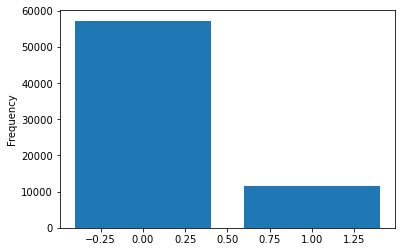

In [10]:
#Some Plots

class_dist = y.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
#Undersampling/Oversampling:

#sampler = RandomOverSampler()
#sampler = RandomUnderSampler()
smotesampler = SMOTE(random_state=42)
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

index = accidents['accident_index']
X = accidents.drop(columns=['accident_index'])

In [12]:
def custom_test_train_split(x, y, test_size=0.2, random_state=42):
    x = x.join(index)
    unique = index.unique()
    train, test = train_test_split(unique, test_size=test_size, random_state=random_state)
    mask_train = x['accident_index'].isin(train)
    mask_test = x['accident_index'].isin(test)
    return x[mask_train].drop(columns=['accident_index']), x[mask_test].drop(columns=['accident_index']), y[mask_train], y[mask_test]

In [13]:
#split test and training data
X_train_ungrouped, X_test_ungrouped, y_train_ungrouped, y_test_ungrouped = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = custom_test_train_split(X, y, test_size=0.2, random_state=42)
X_balanced, y_balanced = smotesampler.fit_resample(X_train_grouped, y_train_grouped)
#class_dist = pd.Series(X_balanced).value_counts()
#plt.bar(class_dist.index, class_dist)
#plt.ylabel("Frequency")
#plt.show()

In [14]:
# Do Preprocessing without pipeline
X_onehot = X.copy()
X_onehot
encoded = pd.DataFrame(one_hot_encoder.fit_transform(X_onehot[one_hot_list]).toarray(),
                       columns=one_hot_encoder.get_feature_names(one_hot_list))
X_onehot = X_onehot.drop(columns=one_hot_list)
X_onehot = X_onehot.join(encoded)
X_onehot[:] = scaler.fit_transform(X_onehot[:])
#Scale all columns to Standard Distribution
X_onehot[:] = imp.fit_transform(X_onehot[:])
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(X_onehot, y, test_size=0.2, random_state=42, stratify=y)
X_prep_balanced, y_prep_balanced = smotesampler.fit_resample(X_prep_train, y_prep_train)

# Creating models

In [15]:
#Logistic Regression
weight_estimator = LogisticRegression(max_iter=20000, random_state=42)

#K-Nearest-Neighbors
neigh = KNeighborsClassifier(n_neighbors=3)

#Random Forest
randomforest = RandomForestClassifier(n_estimators=100, random_state=0)

#Neural Network
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 50), activation='relu',
learning_rate_init=1e-3, batch_size=64, verbose=False,
early_stopping=True,n_iter_no_change = 20, tol = 1e-5, random_state=1234)


estimators = [clf, weight_estimator, neigh, randomforest]
estimators

[MLPClassifier(batch_size=64, early_stopping=True,
               hidden_layer_sizes=(100, 100, 50), n_iter_no_change=20,
               random_state=1234, tol=1e-05),
 LogisticRegression(max_iter=20000, random_state=42),
 KNeighborsClassifier(n_neighbors=3),
 RandomForestClassifier(random_state=0)]

In [16]:
#pipe.set_params(sampler = oversampler)
#pipe.set_params(estimator = weight_estimator)
#pipe.fit(X_train_grouped,y_train_grouped)

# Run estimators

In [17]:


%%script false

#iterate over list
for estimator in estimators:
   print(estimator)
   pipe.set_params(estimator = estimator)
   pipe.set_params(sampler = undersampler)
   pipe.fit(X_balanced, y_balanced)
   prediction = pipe.predict(X_test_grouped)
   print(classification_report(y_test_grouped, prediction))

Couldn't find program: 'false'


In [18]:
%%script false

# Try with other scaler
for samp in [oversampler,undersampler, smotesampler]:
    X_b, y_b = samp.fit_resample(X_train_grouped,y_train_grouped)
    #pipe.set_params(sampler = samp)
    for estimator in estimators:

       print(estimator)
       pipe.set_params(estimator = estimator)
       pipe.set_params(sampler = samp)
       pipe.fit(X_b, y_b)
       prediction = pipe.predict(X_test_grouped)
       print(classification_report(y_test_grouped, prediction))

Couldn't find program: 'false'


# Grid Search

In [19]:
#Create Some Score Functions for Evaluation

#Custom Score puts double weight on recall and single weight on precision
def customScore(y_true, y_pred):
    return 2*recall_score(y_true, y_pred)+precision_score(y_true, y_pred)

#F-Beta-Score is like F1-Score put puts more weight (2) on the Recall Value
def fBetaScorer(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

scorer = {"custom":make_scorer(customScore, greater_is_better=True), "f1": "f1","fbeta":make_scorer(fBetaScorer, greater_is_better=True)}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

## KNN

In [20]:
parameters = {
    #'imputer__strategy': ['mean'],
    'estimator__n_neighbors' : [3,5, 10, 15, 20],#,5,10],#, 'most_frequent']
    'sampler' : [undersampler, oversampler, smotesampler]#, oversampler, smotesampler]
}


pipe.set_params(estimator = neigh)
# create the grid search instance
knn_estimator = GridSearchCV(pipe, parameters, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
knn_estimator.fit(X_train_grouped, y_train_grouped)
print(knn_estimator.best_params_)
print(knn_estimator.best_score_)
pd.DataFrame(knn_estimator.cv_results_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
{'estimator__n_neighbors': 20, 'sampler': SMOTE(random_state=42)}
0.5446939809052573


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__n_neighbors,param_sampler,params,split0_test_custom,split1_test_custom,split2_test_custom,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,0.443603,0.014743,66.258114,4.641076,3,RandomUnderSampler(random_state=42),"{'estimator__n_neighbors': 3, 'sampler': Rando...",1.495335,1.482055,1.509755,...,0.365853,0.003084,13,0.485796,0.479443,0.488651,0.478444,0.483083,0.004276,11
1,0.587134,0.017237,296.753004,1.377688,3,RandomOverSampler(random_state=42),"{'estimator__n_neighbors': 3, 'sampler': Rando...",1.255160,1.207577,1.236756,...,0.363986,0.004463,14,0.427087,0.411128,0.421044,0.418639,0.419475,0.005718,15
2,5.982107,0.267439,292.539047,2.827800,3,SMOTE(random_state=42),"{'estimator__n_neighbors': 3, 'sampler': SMOTE...",1.535833,1.512179,1.530792,...,0.371435,0.002159,8,0.495384,0.488780,0.494760,0.493506,0.493107,0.002588,7
3,0.541372,0.008469,69.417330,2.910012,5,RandomUnderSampler(random_state=42),"{'estimator__n_neighbors': 5, 'sampler': Rando...",1.530038,1.499547,1.513745,...,0.375016,0.002983,6,0.498263,0.488054,0.492154,0.487285,0.491439,0.004353,8
4,0.992725,0.103126,281.093581,4.095851,5,RandomOverSampler(random_state=42),"{'estimator__n_neighbors': 5, 'sampler': Rando...",1.405837,1.359140,1.394631,...,0.370150,0.004566,9,0.468370,0.453047,0.465116,0.462750,0.462321,0.005714,13
5,10.997486,0.519597,283.120790,2.722166,5,SMOTE(random_state=42),"{'estimator__n_neighbors': 5, 'sampler': SMOTE...",1.657076,1.626569,1.638109,...,0.368801,0.002696,11,0.517012,0.508147,0.513016,0.514551,0.513182,0.003237,4
6,0.659399,0.079152,50.234612,0.519436,10,RandomUnderSampler(random_state=42),"{'estimator__n_neighbors': 10, 'sampler': Rand...",1.407630,1.394103,1.417819,...,0.389460,0.003731,3,0.475024,0.468980,0.477084,0.462735,0.470956,0.005604,12
7,0.874450,0.096592,279.994347,1.901576,10,RandomOverSampler(random_state=42),"{'estimator__n_neighbors': 10, 'sampler': Rand...",1.396099,1.351255,1.388470,...,0.372094,0.004830,7,0.466053,0.451722,0.463817,0.462868,0.461115,0.005545,14
8,10.048524,0.906426,289.621399,0.982809,10,SMOTE(random_state=42),"{'estimator__n_neighbors': 10, 'sampler': SMOT...",1.738784,1.683659,1.713317,...,0.369565,0.003091,10,0.532477,0.518213,0.527621,0.520755,0.524767,0.005627,3
9,0.672155,0.061749,52.573885,0.416550,15,RandomUnderSampler(random_state=42),"{'estimator__n_neighbors': 15, 'sampler': Rand...",1.585158,1.527139,1.585746,...,0.399595,0.007225,2,0.522404,0.501281,0.520379,0.508337,0.513100,0.008688,5


In [21]:
knn_estimator.cv_results_["rank_test_fbeta"]

array([11, 15,  7,  8, 13,  4, 12, 14,  3,  5,  9,  2,  6, 10,  1])

In [66]:
print(classification_report(y_test_grouped, knn_estimator.best_estimator_.predict(X_test_grouped)))

print("Performance on Train Data:")
knn_pred_train = knn_estimator.best_estimator_.predict(X_train_grouped)

print(classification_report(y_train_grouped, knn_pred_train))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, knn_pred_train),"\n")

knn_pred_test = knn_estimator.best_estimator_.predict(X_test_grouped)
print("Performance on Test Data:")
print(classification_report(y_test_grouped, knn_pred_test))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, knn_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62     11549
           1       0.23      0.80      0.35      2298

    accuracy                           0.52     13847
   macro avg       0.57      0.63      0.49     13847
weighted avg       0.80      0.52      0.57     13847

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.97      0.52      0.67     45657
           1       0.28      0.92      0.43      9301

    accuracy                           0.58     54958
   macro avg       0.62      0.72      0.55     54958
weighted avg       0.85      0.58      0.63     54958

F-Beta Score:  0.630306603773585 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.46      0.62     11549
           1       0.23      0.80      0.35      2298

    accuracy                           0.52     13847
   macro avg       0.57      0.63      0

## MLP

In [23]:
parameters_nn = {
    'estimator__hidden_layer_sizes' : [(100,75,50), (50,100,50), (50,50)],
    'estimator__learning_rate_init' : [0.0001,0.001], #, 0.01],
    'estimator__batch_size': [64],
    'estimator__solver': ['adam'], #,'sgd'],  #Adam performed best before
    'sampler' : [undersampler, oversampler, smotesampler]
}


pipe.set_params(estimator = clf)
# create the grid search instance
mlp_estimator = GridSearchCV(pipe, parameters_nn, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
mlp_estimator.fit(X_train_grouped, y_train_grouped)
print(mlp_estimator.best_params_)
print(mlp_estimator.best_score_)
pd.DataFrame(mlp_estimator.cv_results_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
{'estimator__batch_size': 64, 'estimator__hidden_layer_sizes': (50, 100, 50), 'estimator__learning_rate_init': 0.001, 'estimator__solver': 'adam', 'sampler': RandomUnderSampler(random_state=42)}
0.5565365237182486


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__batch_size,param_estimator__hidden_layer_sizes,param_estimator__learning_rate_init,param_estimator__solver,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,28.529955,5.983526,0.251806,0.011970,64,"(100, 75, 50)",0.0001,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.412370,0.006586,5,0.561345,0.528091,0.542288,0.553228,0.546238,0.012470,3
1,557.792657,43.299655,0.240803,0.006222,64,"(100, 75, 50)",0.0001,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.325825,0.006234,13,0.351363,0.339659,0.343289,0.324648,0.339740,0.009688,13
2,473.924563,109.538165,0.235052,0.009853,64,"(100, 75, 50)",0.0001,adam,SMOTE(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.320969,0.005017,16,0.333248,0.322067,0.311042,0.329098,0.323864,0.008413,17
3,14.643563,1.212358,0.246807,0.010898,64,"(100, 75, 50)",0.001,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.416385,0.002562,4,0.563759,0.564389,0.535109,0.543749,0.551752,0.012698,2
4,284.452579,19.831792,0.242302,0.008350,64,"(100, 75, 50)",0.001,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.324528,0.009836,14,0.342957,0.314427,0.328395,0.314457,0.325059,0.011799,15
5,346.143781,19.090907,0.238804,0.006101,64,"(100, 75, 50)",0.001,adam,SMOTE(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.304980,0.015523,18,0.305766,0.279186,0.320953,0.273316,0.294805,0.019427,18
6,19.356376,1.694076,0.222051,0.001580,64,"(50, 100, 50)",0.0001,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.418587,0.003966,3,0.558276,0.527701,0.533714,0.545566,0.541314,0.011714,6
7,453.643602,6.620740,0.205546,0.011951,64,"(50, 100, 50)",0.0001,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.347869,0.002822,8,0.396807,0.380032,0.378313,0.389950,0.386276,0.007530,8
8,445.953361,5.006515,0.237305,0.031315,64,"(50, 100, 50)",0.0001,adam,SMOTE(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.326625,0.012185,12,0.364828,0.325396,0.355503,0.315119,0.340211,0.020548,12
9,11.999712,1.247487,0.223801,0.004969,64,"(50, 100, 50)",0.001,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.410884,0.002748,6,0.546812,0.557140,0.565622,0.556572,0.556537,0.006661,1


In [24]:
mlp_estimator.cv_results_["rank_test_fbeta"]

array([ 3, 13, 17,  2, 15, 18,  6,  8, 12,  1, 16, 14,  4,  7, 10,  5,  9,
       11])

In [25]:
print(classification_report(y_test_grouped, mlp_estimator.best_estimator_.predict(X_test_grouped)))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78     11549
           1       0.30      0.69      0.42      2298

    accuracy                           0.68     13847
   macro avg       0.61      0.68      0.60     13847
weighted avg       0.81      0.68      0.72     13847



In [50]:
#%%script false
#undersampler seems best with 0.001 and (50, 100, 50)

parameters2_nn = {
    'estimator__hidden_layer_sizes' : [(50,50), (50,100,50), (70,90,70), (100,75,50)],
    'estimator__learning_rate_init' : [0.001, 0.003, 0.006], #, 0.01],
    'estimator__batch_size': [64],
    'estimator__solver': ['adam'], #,'sgd'],  #Adam performed best before
    'sampler' : [undersampler, oversampler]
}


pipe.set_params(estimator = clf)
# create the grid search instance
mlp2_estimator = GridSearchCV(pipe, parameters2_nn, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
mlp2_estimator.fit(X_train_grouped, y_train_grouped)
print(mlp2_estimator.best_params_)
print(mlp2_estimator.best_score_)
pd.DataFrame(mlp2_estimator.cv_results_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
{'estimator__batch_size': 64, 'estimator__hidden_layer_sizes': (50, 100, 50), 'estimator__learning_rate_init': 0.006, 'estimator__solver': 'adam', 'sampler': RandomUnderSampler(random_state=42)}
0.5580385453843074


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__batch_size,param_estimator__hidden_layer_sizes,param_estimator__learning_rate_init,param_estimator__solver,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,7.164373,0.335330,0.161286,0.005358,64,"(50, 50)",0.001,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.420891,0.011431,2,0.547832,0.535579,0.555083,0.538082,0.544144,0.007800,11
1,228.709998,48.562342,0.177791,0.007631,64,"(50, 50)",0.001,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.342898,0.006669,19,0.386340,0.365403,0.381655,0.382080,0.378869,0.007988,17
2,7.018838,0.429596,0.174290,0.011458,64,"(50, 50)",0.003,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.417256,0.002783,6,0.575512,0.557210,0.546424,0.503608,0.545688,0.026427,9
3,219.902233,36.953061,0.183790,0.009204,64,"(50, 50)",0.003,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.349332,0.003438,16,0.381850,0.388150,0.386623,0.389704,0.386582,0.002941,16
4,6.531227,0.232803,0.165787,0.007823,64,"(50, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.418805,0.003584,3,0.560990,0.546081,0.524880,0.532072,0.541006,0.013829,12
5,161.570790,23.293211,0.177539,0.014726,64,"(50, 50)",0.006,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.370623,0.004880,13,0.437447,0.433157,0.426069,0.436614,0.433322,0.004486,13
6,10.726926,1.176040,0.193794,0.002386,64,"(50, 100, 50)",0.001,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.410884,0.002748,10,0.546812,0.557140,0.565622,0.556572,0.556537,0.006661,2
7,239.895776,19.972756,0.209547,0.004388,64,"(50, 100, 50)",0.001,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.319564,0.009747,24,0.331480,0.314530,0.340345,0.311913,0.324567,0.011807,24
8,9.660935,0.189789,0.203795,0.013649,64,"(50, 100, 50)",0.003,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.416621,0.009823,7,0.549635,0.549715,0.551438,0.563962,0.553688,0.005975,4
9,277.366576,14.913999,0.240304,0.015709,64,"(50, 100, 50)",0.003,adam,RandomOverSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.338748,0.002155,20,0.360732,0.355621,0.360390,0.355393,0.358034,0.002531,19


In [51]:
#best score was (50,100,50), 0.006, undersampler)

parameters2_nn = {
    'estimator__hidden_layer_sizes' : [(50,100,50), (50,50,50), (50,70,50)],
    'estimator__learning_rate_init' : [0.006, 0.007, 0.008], #0.007 best
    'estimator__batch_size': [64, 80 ,100],
    'estimator__solver': ['adam'], #,'sgd'],  #Adam performed best before
    'sampler' : [undersampler]
}


pipe.set_params(estimator = clf)
# create the grid search instance
mlp2_estimator = GridSearchCV(pipe, parameters2_nn, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
mlp2_estimator.fit(X_train_grouped, y_train_grouped)
print(mlp2_estimator.best_params_)
print(mlp2_estimator.best_score_)
pd.DataFrame(mlp2_estimator.cv_results_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
{'estimator__batch_size': 80, 'estimator__hidden_layer_sizes': (50, 100, 50), 'estimator__learning_rate_init': 0.006, 'estimator__solver': 'adam', 'sampler': RandomUnderSampler(random_state=42)}
0.5642266588408232


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__batch_size,param_estimator__hidden_layer_sizes,param_estimator__learning_rate_init,param_estimator__solver,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,10.328588,0.246455,0.191793,0.008957,64,"(50, 100, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.410719,0.002422,22,0.562594,0.565077,0.540725,0.563758,0.558039,0.010035,3
1,10.057776,0.877268,0.200295,0.006301,64,"(50, 100, 50)",0.007,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.414163,0.011289,19,0.560529,0.567116,0.546568,0.550047,0.556065,0.008192,8
2,10.241317,1.415088,0.201046,0.010077,64,"(50, 100, 50)",0.008,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.406257,0.003271,27,0.580705,0.535678,0.549108,0.564491,0.557495,0.016837,5
3,8.403401,0.569447,0.174789,0.010355,64,"(50, 50, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.416107,0.011437,14,0.561813,0.563089,0.550822,0.550274,0.556499,0.005972,7
4,7.842023,0.783500,0.172290,0.005070,64,"(50, 50, 50)",0.007,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.419545,0.009982,6,0.540696,0.536659,0.551012,0.547900,0.544067,0.005682,23
5,8.761231,0.566261,0.176540,0.006346,64,"(50, 50, 50)",0.008,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.417281,0.005884,10,0.561771,0.540680,0.551692,0.537004,0.547787,0.009716,18
6,9.140069,0.933872,0.220300,0.023194,64,"(50, 70, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.417873,0.009864,8,0.550812,0.548400,0.560417,0.545872,0.551375,0.005505,12
7,8.062575,0.261945,0.200044,0.019917,64,"(50, 70, 50)",0.007,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.415840,0.010520,16,0.551291,0.558443,0.534148,0.550175,0.548514,0.008881,17
8,8.830747,0.245930,0.195044,0.007450,64,"(50, 70, 50)",0.008,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 64, 'estimator__hidd...",...,0.411413,0.006792,21,0.566959,0.548037,0.553623,0.562209,0.557707,0.007350,4
9,8.772734,0.818481,0.187293,0.003269,80,"(50, 100, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 80, 'estimator__hidd...",...,0.406921,0.007351,26,0.581168,0.567403,0.538885,0.569451,0.564227,0.015545,1


In [53]:
#still was (50,100,50), 0.006, undersampler, batch = 80)


parameters2_nn = {
    'estimator__hidden_layer_sizes' : [(50,100,50)],
    'estimator__learning_rate_init' : [0.006, 0.0065, 0.0055], #0.007 best
    'estimator__batch_size': [80,78, 82],
    'estimator__solver': ['adam'], #,'sgd'],  #Adam performed best before
    'sampler' : [undersampler]
}


pipe.set_params(estimator = clf)
# create the grid search instance
mlp2_estimator = GridSearchCV(pipe, parameters2_nn, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
mlp2_estimator.fit(X_train_grouped, y_train_grouped)
print(mlp2_estimator.best_params_)
print(mlp2_estimator.best_score_)
pd.DataFrame(mlp2_estimator.cv_results_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
{'estimator__batch_size': 80, 'estimator__hidden_layer_sizes': (50, 100, 50), 'estimator__learning_rate_init': 0.006, 'estimator__solver': 'adam', 'sampler': RandomUnderSampler(random_state=42)}
0.5642266588408232


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__batch_size,param_estimator__hidden_layer_sizes,param_estimator__learning_rate_init,param_estimator__solver,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,8.886261,0.393580,0.230051,0.014339,80,"(50, 100, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 80, 'estimator__hidd...",...,0.406921,0.007351,7,0.581168,0.567403,0.538885,0.569451,0.564227,0.015545,1
1,9.370870,0.441908,0.216550,0.009125,80,"(50, 100, 50)",0.0065,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 80, 'estimator__hidd...",...,0.406445,0.006962,8,0.565635,0.553673,0.567065,0.563098,0.562368,0.005217,2
2,8.858503,0.963384,0.212049,0.017281,80,"(50, 100, 50)",0.0055,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 80, 'estimator__hidd...",...,0.407662,0.005461,5,0.577635,0.550570,0.563016,0.556891,0.562028,0.010028,3
3,8.948775,0.363602,0.238054,0.015940,78,"(50, 100, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 78, 'estimator__hidd...",...,0.411059,0.002315,4,0.565903,0.557774,0.556575,0.558768,0.559755,0.003633,4
4,8.893011,0.394770,0.200296,0.003491,78,"(50, 100, 50)",0.0065,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 78, 'estimator__hidd...",...,0.412630,0.008919,2,0.557174,0.555519,0.555556,0.566825,0.558768,0.004699,5
5,9.399376,0.829275,0.175789,0.035466,78,"(50, 100, 50)",0.0055,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 78, 'estimator__hidd...",...,0.407015,0.012595,6,0.573026,0.542646,0.551057,0.547050,0.553445,0.011690,6
6,9.544159,1.001735,0.155285,0.032391,82,"(50, 100, 50)",0.006,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 82, 'estimator__hidd...",...,0.411487,0.008348,3,0.565126,0.526695,0.552103,0.561157,0.551270,0.014953,7
7,9.104059,0.663832,0.142281,0.024727,82,"(50, 100, 50)",0.0065,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 82, 'estimator__hidd...",...,0.413858,0.013680,1,0.542082,0.532762,0.524060,0.568592,0.541874,0.016690,9
8,5.910225,0.719767,0.102773,0.003563,82,"(50, 100, 50)",0.0055,adam,RandomUnderSampler(random_state=42),"{'estimator__batch_size': 82, 'estimator__hidd...",...,0.401556,0.008844,9,0.579218,0.515158,0.558689,0.525326,0.544598,0.025667,8


In [65]:
#Best Score is MLP with (50,100,50) layers, LR = 0.006, Undersampler
print("Performance on Train Data:")
mlp_pred_train = mlp2_estimator.best_estimator_.predict(X_train_grouped)

print(classification_report(y_train_grouped, mlp_pred_train))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, mlp_pred_train),"\n")

mlp_pred_test = mlp2_estimator.best_estimator_.predict(X_test_grouped)
print("Performance on Test Data:")
print(classification_report(y_test_grouped, mlp_pred_test))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, mlp_pred_test))

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82     45657
           1       0.34      0.67      0.45      9301

    accuracy                           0.72     54958
   macro avg       0.63      0.70      0.63     54958
weighted avg       0.82      0.72      0.75     54958

F-Beta Score:  0.5604674613750135 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     11549
           1       0.31      0.64      0.42      2298

    accuracy                           0.71     13847
   macro avg       0.61      0.68      0.61     13847
weighted avg       0.81      0.71      0.74     13847

F-Beta Score:  0.5306578283738022


## Decision Tree

In [30]:
parameters_dt = {
    'sampler' : [undersampler, oversampler, smotesampler],
    'estimator__max_features' : [10,20,30,100]
}

dt_classy = DecisionTreeClassifier(random_state=42, criterion="gini", max_features=20)
pipe.set_params(estimator = dt_classy)
# create the grid search instance
dt_estimator = GridSearchCV(pipe, parameters_dt, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
dt_estimator.fit(X_train_grouped, y_train_grouped)
print(dt_estimator.best_params_)
print(dt_estimator.best_score_)
pd.DataFrame(dt_estimator.cv_results_)

#undersampler best

Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'estimator__max_features': 100, 'sampler': RandomUnderSampler(random_state=42)}
0.47305730832667425


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_features,param_sampler,params,split0_test_custom,split1_test_custom,split2_test_custom,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,0.826438,0.008138,0.110775,0.003031,10,RandomUnderSampler(random_state=42),"{'estimator__max_features': 10, 'sampler': Ran...",1.423790,1.441310,1.466941,...,0.338716,0.003343,4,0.453623,0.461203,0.466162,0.456279,0.459317,0.004798,4
1,2.881910,0.035976,0.132532,0.005769,10,RandomOverSampler(random_state=42),"{'estimator__max_features': 10, 'sampler': Ran...",0.923970,0.923606,0.893963,...,0.299608,0.010073,12,0.308096,0.307904,0.296588,0.281258,0.298461,0.010971,12
2,9.234065,0.042919,0.134030,0.003536,10,SMOTE(random_state=42),"{'estimator__max_features': 10, 'sampler': SMO...",0.946608,0.890056,0.986672,...,0.311695,0.013930,10,0.320347,0.300042,0.332575,0.335638,0.322151,0.013988,9
3,0.906705,0.009235,0.125028,0.011361,20,RandomUnderSampler(random_state=42),"{'estimator__max_features': 20, 'sampler': Ran...",1.488589,1.471998,1.435403,...,0.341170,0.005259,3,0.474304,0.467265,0.457645,0.454127,0.463335,0.007952,3
4,4.865730,0.150003,0.194171,0.013366,20,RandomOverSampler(random_state=42),"{'estimator__max_features': 20, 'sampler': Ran...",0.919058,0.958611,0.944763,...,0.311210,0.006050,11,0.306596,0.320551,0.313824,0.304217,0.311297,0.006408,11
5,10.517353,0.292987,0.146284,0.015192,20,SMOTE(random_state=42),"{'estimator__max_features': 20, 'sampler': SMO...",0.988084,1.019246,0.977401,...,0.322787,0.004676,8,0.334528,0.344756,0.328411,0.326418,0.333528,0.007138,6
6,1.038736,0.031578,0.176291,0.019312,30,RandomUnderSampler(random_state=42),"{'estimator__max_features': 30, 'sampler': Ran...",1.480269,1.512481,1.474916,...,0.347688,0.004281,2,0.472964,0.479875,0.471779,0.461992,0.471653,0.006377,2
7,6.754492,0.116492,0.140282,0.014009,30,RandomOverSampler(random_state=42),"{'estimator__max_features': 30, 'sampler': Ran...",1.005073,0.943903,0.933171,...,0.317794,0.008907,9,0.336465,0.314544,0.311021,0.314320,0.319087,0.010129,10
8,10.537351,0.056973,0.111025,0.005340,30,SMOTE(random_state=42),"{'estimator__max_features': 30, 'sampler': SMO...",1.015520,0.977462,0.992802,...,0.323081,0.005931,7,0.342874,0.329772,0.333982,0.327091,0.333430,0.005980,7
9,2.068218,0.061676,0.169038,0.024378,100,RandomUnderSampler(random_state=42),"{'estimator__max_features': 100, 'sampler': Ra...",1.489825,1.521880,1.442341,...,0.349854,0.005154,1,0.476143,0.484345,0.461533,0.470207,0.473057,0.008335,1


In [18]:
##Undersampler was best for all
parameters_dt = {
    'sampler' : [undersampler],
    'estimator__max_features' : [10,20,30,100],
    'estimator__max_depth' :[10,11],
    'estimator__ccp_alpha' :[0.0002,0.00022,0.00021],
    'Imputer__ord_strategy' : ['mean','median']
}

dt_classy = DecisionTreeClassifier(random_state=42, criterion="gini", max_features=20)
pipe.set_params(estimator = dt_classy)
# create the grid search instance
dt_estimator = GridSearchCV(pipe, parameters_dt, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
dt_estimator.fit(X_train_grouped, y_train_grouped)
print(dt_estimator.best_params_)
print(dt_estimator.best_score_)
pd.DataFrame(dt_estimator.cv_results_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
{'Imputer__ord_strategy': 'mean', 'estimator__ccp_alpha': 0.00022, 'estimator__max_depth': 10, 'estimator__max_features': 30, 'sampler': RandomUnderSampler(random_state=42)}
0.5359503997868581


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Imputer__ord_strategy,param_estimator__ccp_alpha,param_estimator__max_depth,param_estimator__max_features,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,0.670152,0.042794,0.154534,0.014171,mean,0.0002,10,10,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.390417,0.007824,37,0.521004,0.495317,0.522378,0.507280,0.511495,0.011049,43
1,0.717910,0.020950,0.147285,0.005890,mean,0.0002,10,20,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.398964,0.009237,23,0.539734,0.544665,0.520589,0.519956,0.531236,0.011103,11
2,0.757921,0.005630,0.145283,0.014223,mean,0.0002,10,30,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.403501,0.007021,5,0.550072,0.546583,0.538241,0.500597,0.533873,0.019687,5
3,1.159788,0.092200,0.252385,0.043254,mean,0.0002,10,100,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.400782,0.001843,13,0.542790,0.529257,0.535607,0.514386,0.530510,0.010468,15
4,0.622644,0.021738,0.161276,0.010942,mean,0.0002,11,10,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.382345,0.012436,43,0.525965,0.508475,0.524830,0.484826,0.511024,0.016633,45
5,0.693398,0.014222,0.182042,0.010679,mean,0.0002,11,20,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.399233,0.003898,21,0.529328,0.530997,0.517718,0.514510,0.523138,0.007140,25
6,0.762408,0.053143,0.204559,0.012439,mean,0.0002,11,30,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.397508,0.010122,33,0.536390,0.523106,0.522214,0.504975,0.521671,0.011155,31
7,1.232523,0.089707,0.199178,0.025338,mean,0.0002,11,100,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.395066,0.005554,35,0.535571,0.506024,0.516882,0.513784,0.518065,0.010853,35
8,0.655693,0.037087,0.192070,0.020431,mean,0.00022,10,10,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.390106,0.006807,39,0.522125,0.496714,0.522378,0.507705,0.512230,0.010748,37
9,0.733881,0.043441,0.178181,0.019722,mean,0.00022,10,20,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.398419,0.009025,27,0.534229,0.540174,0.519995,0.523382,0.529445,0.008125,17


In [23]:
##Undersampler was best for all
parameters_dt = {
    'sampler' : [undersampler],
    'estimator__max_features' : [30,40, 33],
    'estimator__max_depth' :[10,11],
    'estimator__ccp_alpha' :[0.0002,0.00022,0.00021],
    'Imputer__ord_strategy' : ['mean','median']
}

dt_classy = DecisionTreeClassifier(random_state=42, criterion="gini", max_features=20)
pipe.set_params(estimator = dt_classy)
# create the grid search instance
dt_estimator = GridSearchCV(pipe, parameters_dt, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
dt_estimator.fit(X_train_grouped, y_train_grouped)
print(dt_estimator.best_params_)
print(dt_estimator.best_score_)
pd.DataFrame(dt_estimator.cv_results_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
{'Imputer__ord_strategy': 'mean', 'estimator__ccp_alpha': 0.00022, 'estimator__max_depth': 10, 'estimator__max_features': 30, 'sampler': RandomUnderSampler(random_state=42)}
0.5359503997868581


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Imputer__ord_strategy,param_estimator__ccp_alpha,param_estimator__max_depth,param_estimator__max_features,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,0.724413,0.011302,0.141165,0.012041,mean,0.0002,10,30,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.403501,0.007021,11,0.550072,0.546583,0.538241,0.500597,0.533873,0.019687,3
1,0.807562,0.067851,0.146727,0.019004,mean,0.0002,10,40,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.406130,0.011794,3,0.542906,0.534176,0.527810,0.499065,0.525989,0.016443,13
2,0.809565,0.054424,0.179983,0.025857,mean,0.0002,10,33,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.400590,0.008035,17,0.516356,0.535059,0.518398,0.505352,0.518791,0.010622,35
3,0.812194,0.058966,0.206416,0.019697,mean,0.0002,11,30,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.397508,0.010122,29,0.536390,0.523106,0.522214,0.504975,0.521671,0.011155,25
4,0.886816,0.053314,0.159293,0.009347,mean,0.0002,11,40,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.396331,0.007482,35,0.525550,0.524366,0.519063,0.524125,0.523276,0.002492,17
5,0.816173,0.019715,0.169298,0.006687,mean,0.0002,11,33,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.398569,0.008666,23,0.528130,0.523523,0.521070,0.511973,0.521174,0.005886,29
6,0.718921,0.031038,0.172671,0.008253,mean,0.00022,10,30,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.404779,0.005604,7,0.550086,0.546296,0.538798,0.508622,0.535950,0.016292,1
7,0.831335,0.064830,0.205797,0.024728,mean,0.00022,10,40,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.406615,0.012984,1,0.547316,0.535318,0.526775,0.499414,0.527206,0.017626,9
8,0.804059,0.017835,0.144283,0.011587,mean,0.00022,10,33,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.402330,0.008497,13,0.524946,0.534129,0.518181,0.502795,0.520013,0.011439,33
9,0.827935,0.026171,0.174290,0.031594,mean,0.00022,11,30,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.399625,0.010202,19,0.534114,0.524437,0.523198,0.506393,0.522036,0.009971,21


In [24]:
#Best Score is DT with 100 max features, ccp = 0.00022, max_features = 30, max_depth = 10, undersampler

print("Performance on Train Data:")
dt_pred_train = dt_estimator.best_estimator_.predict(X_train_grouped)

print(classification_report(y_train_grouped, dt_pred_train))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, dt_pred_train),"\n")

dt_pred_test = dt_estimator.best_estimator_.predict(X_test_grouped)
print("Performance on Test Data:")
print(classification_report(y_test_grouped, dt_pred_test))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, dt_pred_test))

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76     45657
           1       0.29      0.70      0.41      9301

    accuracy                           0.66     54958
   macro avg       0.60      0.68      0.59     54958
weighted avg       0.81      0.66      0.70     54958

F-Beta Score:  0.5448162055668748 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76     11549
           1       0.28      0.69      0.40      2298

    accuracy                           0.66     13847
   macro avg       0.60      0.67      0.58     13847
weighted avg       0.81      0.66      0.70     13847

F-Beta Score:  0.5319651657328023


In [25]:
scores_train = cross_val_score(dt_estimator.best_estimator_, X_train_grouped, y_train_grouped, cv = cv, scoring=make_scorer(fBetaScorer, greater_is_better=True))
print(scores_train.mean(), scores_train)

0.5359503997868581 [0.5500859  0.54629569 0.53879752 0.5086225 ]


### Find best features
#### First, we have to regenerate the columns, which are created by the onehotencoder:

In [34]:
columns = one_hot_list+ordinal_list
X_onehot = X.copy()
X_onehot = pd.DataFrame(imputer.fit_transform(X_onehot), columns=columns)
encoded = pd.DataFrame(one_hot_encoder.fit_transform(X_onehot[one_hot_list]).toarray(),
                       columns=one_hot_encoder.get_feature_names(one_hot_list))
X_onehot = X_onehot.drop(columns=one_hot_list)
X_onehot = X_onehot.join(encoded)
print(X_onehot.columns)
columns_preprocessed = X_onehot.columns

Index(['number_of_vehicles', 'number_of_casualties', 'month', 'day_of_week',
       'time', 'speed_limit', 'age_band_of_casualty', 'age_band_of_driver',
       'engine_capacity_cc', 'age_of_vehicle',
       ...
       'driver_imd_decile_4.0', 'driver_imd_decile_5.0',
       'driver_imd_decile_6.0', 'driver_imd_decile_7.0',
       'driver_imd_decile_8.0', 'driver_imd_decile_9.0',
       'driver_imd_decile_10.0', 'driver_home_area_type_1.0',
       'driver_home_area_type_2.0', 'driver_home_area_type_3.0'],
      dtype='object', length=198)


#### Now, lets find the most important features

In [27]:
columns = one_hot_list.copy()
for i in ordinal_list:
    columns.append(i)
importances = list(zip(columns_preprocessed,dt_estimator.best_estimator_.get_params()['steps'][-1][1].feature_importances_))
importances.sort(key = lambda x:x[1], reverse=True)
for i in importances[:]:
    print(i[0] , "\t\t:", i[1])

urban_or_rural_area_3.0 		: 0.37263932455577015
hit_object_off_carriageway_4.0 		: 0.17828044906710347
special_conditions_at_site_5.0 		: 0.07709479592838966
driver_imd_decile_4.0 		: 0.048964630194709445
hit_object_in_carriageway_2.0 		: 0.04541829226255056
driver_imd_decile_10.0 		: 0.03161724562103072
driver_imd_decile_8.0 		: 0.03069153641712009
vehicle_location_restricted_lane_9.0 		: 0.02804004739100384
special_conditions_at_site_4.0 		: 0.02540114789271599
vehicle_manoeuvre_9.0 		: 0.017594855295168587
hit_object_in_carriageway_4.0 		: 0.015130790567004787
driver_home_area_type_1.0 		: 0.010025198357075167
hit_object_in_carriageway_12.0 		: 0.009582930471701202
driver_home_area_type_3.0 		: 0.00950103017701312
junction_detail_6.0 		: 0.008814289282575652
special_conditions_at_site_7.0 		: 0.007511822182769949
hit_object_off_carriageway_6.0 		: 0.007479920115190997
vehicle_leaving_carriageway_3.0 		: 0.006975624318029063
vehicle_location_restricted_lane_0.0 		: 0.0069209764848011

In [36]:
len(dt_estimator.best_estimator_.get_params()['steps'][-1][1].feature_importances_)

198

In [37]:
best_dt = DecisionTreeClassifier(random_state=42, criterion="gini",max_features=100, max_depth=10, ccp_alpha=0.00021)
pipe.set_params(estimator = dt_classy)
pipe.set_params(sampler = undersampler)
pipe.fit(X_train_grouped, y_train_grouped)
print(classification_report(y_test_grouped, pipe.predict(X_test_grouped)))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71     11549
           1       0.23      0.60      0.33      2298

    accuracy                           0.60     13847
   macro avg       0.55      0.60      0.52     13847
weighted avg       0.77      0.60      0.65     13847



## Logistic Regression

In [39]:
parameters_dt = {
    'sampler' : [undersampler, oversampler, smotesampler],
    'estimator__penalty' : ['none','l2'],
    'estimator__C' :[0.001,0.01,0.1,1,10,100,1000],
    'estimator__max_iter' :[10,50,100,1000,2000,5000]
}

dt_classy = weight_estimator
pipe.set_params(estimator = weight_estimator)
# create the grid search instance
logreg_estimator = GridSearchCV(pipe, parameters_dt, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
logreg_estimator.fit(X_train_grouped, y_train_grouped)
print(logreg_estimator.best_params_)
print(logreg_estimator.best_score_)
pd.DataFrame(logreg_estimator.cv_results_)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits
{'estimator__C': 0.01, 'estimator__max_iter': 100, 'estimator__penalty': 'l2', 'sampler': RandomOverSampler(random_state=42)}
0.5470928577047854


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__max_iter,param_estimator__penalty,param_sampler,params,split0_test_custom,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,0.639144,0.017136,0.193294,0.026057,0.001,10,none,RandomUnderSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",1.688118,...,0.419148,0.005254,103,0.553904,0.546454,0.537530,0.534271,0.543040,0.007696,84
1,0.881199,0.017424,0.144282,0.012440,0.001,10,none,RandomOverSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",1.703265,...,0.419060,0.004850,114,0.556661,0.540980,0.534500,0.535329,0.541867,0.008898,115
2,8.037875,0.459144,0.266819,0.018428,0.001,10,none,SMOTE(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",1.682672,...,0.414187,0.005599,230,0.550740,0.530924,0.529702,0.525857,0.534306,0.009671,182
3,0.678405,0.028332,0.150281,0.024996,0.001,10,l2,RandomUnderSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",1.677157,...,0.412784,0.003960,252,0.547126,0.541681,0.538873,0.528800,0.539120,0.006656,168
4,0.748420,0.049903,0.146783,0.008702,0.001,10,l2,RandomOverSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",1.713937,...,0.420145,0.004559,72,0.559163,0.547528,0.538647,0.540157,0.546374,0.008113,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,37.234140,6.181378,0.352582,0.030043,1000,5000,none,RandomOverSampler(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",1.707464,...,0.423292,0.005242,30,0.559385,0.545782,0.534756,0.541156,0.545270,0.009041,41
248,47.548963,3.345568,0.177289,0.071425,1000,5000,none,SMOTE(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",1.681459,...,0.416139,0.005090,185,0.550958,0.532264,0.525244,0.526075,0.533635,0.010363,206
249,10.061771,1.256230,0.402340,0.013558,1000,5000,l2,RandomUnderSampler(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",1.688031,...,0.418694,0.005215,132,0.553522,0.542235,0.534837,0.534069,0.541166,0.007814,132
250,31.488843,1.234249,0.164786,0.053188,1000,5000,l2,RandomOverSampler(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",1.707344,...,0.423233,0.005196,45,0.559308,0.545858,0.534756,0.541004,0.545231,0.009030,55


In [40]:
print("Performance on Train Data:")
logreg_pred_train = logreg_estimator.best_estimator_.predict(X_train_grouped)

print(classification_report(y_train_grouped, logreg_pred_train))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, logreg_pred_train),"\n")

logreg_pred_test = logreg_estimator.best_estimator_.predict(X_test_grouped)
print("Performance on Test Data:")
print(classification_report(y_test_grouped, logreg_pred_test))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, logreg_pred_test))

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79     45657
           1       0.31      0.68      0.43      9301

    accuracy                           0.69     54958
   macro avg       0.61      0.69      0.61     54958
weighted avg       0.81      0.69      0.73     54958

F-Beta Score:  0.5494295918721176 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.69      0.78     11549
           1       0.30      0.68      0.42      2298

    accuracy                           0.69     13847
   macro avg       0.61      0.68      0.60     13847
weighted avg       0.81      0.69      0.72     13847

F-Beta Score:  0.5450121654501217


#### Find most important features using the feature names from the regeneration done when finding the best features for the Decision Tree

In [41]:
importances = list(zip(columns_preprocessed,logreg_estimator.best_estimator_.get_params()['steps'][-1][1].coef_[0]))
importances.sort(key = lambda x:x[1], reverse=True)
for i in importances[:]:
    print(i[0] , "\t\t:", i[1])

urban_or_rural_area_3.0 		: 1.026550462805235
vehicle_leaving_carriageway_3.0 		: 0.3894092619668602
hit_object_in_carriageway_6.0 		: 0.3163453984532997
hit_object_off_carriageway_3.0 		: 0.31040646741888256
driver_imd_decile_10.0 		: 0.2786979960605933
casualty_imd_decile_9.0 		: 0.275593598254167
vehicle_manoeuvre_4.0 		: 0.27271342854958525
towing_and_articulation_5.0 		: 0.2465990492632835
casualty_imd_decile_4.0 		: 0.23345774305043007
skidding_and_overturning_4.0 		: 0.214594070543475
junction_detail_5.0 		: 0.2015279140726744
engine_capacity_cc 		: 0.1975006405565364
first_road_class_1.0 		: 0.18963107074117766
vehicle_manoeuvre_99.0 		: 0.18845218090912283
hit_object_off_carriageway_2.0 		: 0.18391933887729822
driver_imd_decile_9.0 		: 0.18212341700320156
junction_detail_0.0 		: 0.17708068246128014
vehicle_manoeuvre_5.0 		: 0.17650455515340235
road_surface_conditions_4.0 		: 0.16322495118442026
light_conditions_5.0 		: 0.1523282176372601
junction_location_1.0 		: 0.14824364898

In [40]:
logreg_estimator.best_estimator_.get_params()['steps'][-1][1].coef_

array([[ 1.63966706e-02,  6.88557652e-03,  5.70599646e-02,
        -4.93944746e-03, -6.21721963e-02, -8.85755913e-02,
        -9.22947483e-02,  4.39633862e-02,  1.97500641e-01,
        -4.73631192e-02,  1.89631071e-01, -1.55898211e-01,
        -9.24117432e-03,  4.64324862e-02, -1.31793917e-01,
         7.63081630e-02, -4.06142007e-02,  3.84063512e-02,
         1.07533478e-01, -1.80620155e-01,  1.77080682e-01,
        -9.07634372e-02, -1.79375194e-01,  1.11010942e-01,
         2.01527914e-01,  1.09625269e-01, -2.29558363e-01,
         3.21981908e-02, -1.64542290e-01,  7.68872681e-02,
         1.30896144e-01, -1.27752955e-01,  1.34510367e-02,
         5.20931739e-02,  1.52328218e-01,  1.42301005e-01,
        -1.66298515e-01, -1.58163353e-01,  4.30632133e-02,
         8.33544986e-02, -7.93277628e-02, -6.03674104e-02,
        -3.43908142e-02,  1.09140342e-01,  4.14714480e-03,
         9.90653730e-02, -1.08390803e-01,  1.63224951e-01,
        -1.31634647e-01, -2.19613741e-02,  8.48531781e-0

## Random Forest

In [73]:
parameters_rf = {
    #'imputer__strategy': ['mean'],
    'estimator__n_estimators' : [10,50,100,150,200],
    'estimator__max_depth' :[None, 10, 20],
    'estimator__ccp_alpha' : [0.0,0.0002,0.02,0.2,2],
    'sampler' : [undersampler, oversampler, smotesampler],
    'Imputer__ord_strategy' : ['mean','median']
}


pipe.set_params(estimator = randomforest)
# create the grid search instance
rf_estimator = GridSearchCV(pipe, parameters_rf, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
rf_estimator.fit(X_train_grouped, y_train_grouped)
print(rf_estimator.best_params_)
print(rf_estimator.best_score_)
pd.DataFrame(rf_estimator.cv_results_)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
{'Imputer__ord_strategy': 'mean', 'estimator__ccp_alpha': 0.0, 'estimator__max_depth': 20, 'estimator__n_estimators': 200, 'sampler': RandomUnderSampler(random_state=42)}
0.5627582407339781


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Imputer__ord_strategy,param_estimator__ccp_alpha,param_estimator__max_depth,param_estimator__n_estimators,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,2.890981,0.085312,0.178291,0.012560,mean,0.0,None,10,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.397279,0.005560,127,0.504670,0.498856,0.489826,0.477060,0.492603,0.010416,111
1,24.179055,1.285801,0.163037,0.001582,mean,0.0,None,10,RandomOverSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.327168,0.004087,247,0.274474,0.275609,0.279417,0.269549,0.274763,0.003523,337
2,30.360476,0.546808,0.161538,0.005125,mean,0.0,None,10,SMOTE(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.281896,0.014374,271,0.241151,0.234694,0.215669,0.209944,0.225365,0.012923,373
3,13.011519,0.628412,0.297067,0.011115,mean,0.0,None,50,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.427940,0.004327,37,0.558381,0.549553,0.544773,0.546036,0.549686,0.005317,47
4,113.519852,1.877567,0.329324,0.006420,mean,0.0,None,50,RandomOverSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.353449,0.010335,199,0.309684,0.302684,0.289426,0.280262,0.295514,0.011423,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,201.423300,1.708370,0.331825,0.007464,median,2,20,150,RandomOverSampler(random_state=42),"{'Imputer__ord_strategy': 'median', 'estimator...",...,0.217118,0.125353,277,0.504687,0.504557,0.504579,0.000000,0.378456,0.218502,175
446,225.964349,8.433356,0.287315,0.014775,median,2,20,150,SMOTE(random_state=42),"{'Imputer__ord_strategy': 'median', 'estimator...",...,0.217118,0.125353,277,0.504687,0.504557,0.504579,0.000000,0.378456,0.218502,175
447,39.753990,2.431217,0.447603,0.032261,median,2,20,200,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'median', 'estimator...",...,0.289485,0.000042,259,0.504687,0.504557,0.504579,0.504579,0.504601,0.000051,99
448,256.583774,3.641882,0.283565,0.019010,median,2,20,200,RandomOverSampler(random_state=42),"{'Imputer__ord_strategy': 'median', 'estimator...",...,0.217118,0.125353,277,0.504687,0.504557,0.504579,0.000000,0.378456,0.218502,175


In [74]:
rf_estimator.cv_results_

{'mean_fit_time': array([2.89098144e+00, 2.41790550e+01, 3.03604755e+01, 1.30115195e+01,
        1.13519852e+02, 1.27654442e+02, 2.49287038e+01, 2.36807262e+02,
        2.54857577e+02, 3.66619434e+01, 3.35632208e+02, 3.72450575e+02,
        5.25292860e+01, 4.58405961e+02, 5.12189800e+02, 8.86829495e-01,
        3.40414870e+00, 8.67784530e+00, 2.99468100e+00, 1.57311876e+01,
        2.17609916e+01, 5.64677072e+00, 2.96337906e+01, 3.69121011e+01,
        7.92729217e+00, 4.28744493e+01, 5.30727757e+01, 1.05313815e+01,
        5.84983495e+01, 6.75485123e+01, 2.22811377e+00, 1.47921066e+01,
        2.07557149e+01, 9.81548417e+00, 7.06631082e+01, 8.17252842e+01,
        1.83836775e+01, 1.35391259e+02, 1.62452610e+02, 2.89902389e+01,
        2.06802418e+02, 2.47923796e+02, 3.66999094e+01, 2.77441428e+02,
        3.28350160e+02, 2.79563731e+00, 2.62261165e+01, 3.00059081e+01,
        1.37233720e+01, 1.33138166e+02, 1.37475653e+02, 2.62495281e+01,
        2.46803728e+02, 2.59127988e+02, 4.05653

In [23]:
parameters_rf = {
    #'imputer__strategy': ['mean'],
    'estimator__n_estimators' : [200],
    'estimator__max_depth' :[20],
    'estimator__ccp_alpha' : [0.0],
    'sampler' : [undersampler],
    'Imputer__ord_strategy' : ['mean']
}


pipe.set_params(estimator = randomforest)
# create the grid search instance
rf_estimator = GridSearchCV(pipe, parameters_rf, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
rf_estimator.fit(X_train_grouped, y_train_grouped)
print(rf_estimator.best_params_)
print(rf_estimator.best_score_)
pd.DataFrame(rf_estimator.cv_results_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
{'Imputer__ord_strategy': 'mean', 'estimator__ccp_alpha': 0.0, 'estimator__max_depth': 20, 'estimator__n_estimators': 200, 'sampler': RandomUnderSampler(random_state=42)}
0.5627582407339781


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Imputer__ord_strategy,param_estimator__ccp_alpha,param_estimator__max_depth,param_estimator__n_estimators,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,23.168431,0.186341,0.572333,0.007989,mean,0.0,20,200,RandomUnderSampler(random_state=42),"{'Imputer__ord_strategy': 'mean', 'estimator__...",...,0.433677,0.006386,1,0.575374,0.572683,0.554558,0.548419,0.562758,0.011516,1


In [24]:
print("Performance on Train Data:")
rf_pred_train = rf_estimator.best_estimator_.predict(X_train_grouped)

print(classification_report(y_train_grouped, rf_pred_train))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, rf_pred_train),"\n")

rf_pred_test = rf_estimator.best_estimator_.predict(X_test_grouped)
print("Performance on Test Data:")
print(classification_report(y_test_grouped, rf_pred_test))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, rf_pred_test))

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     45657
           1       0.42      0.94      0.58      9301

    accuracy                           0.77     54958
   macro avg       0.70      0.84      0.71     54958
weighted avg       0.89      0.77      0.80     54958

F-Beta Score:  0.7552227448810184 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     11549
           1       0.29      0.71      0.42      2298

    accuracy                           0.67     13847
   macro avg       0.61      0.69      0.59     13847
weighted avg       0.82      0.67      0.71     13847

F-Beta Score:  0.5530673181324648


#### Find most important features

In [35]:
rf_estimator.best_estimator_.get_params()['steps'][-1][1].feature_importances_
importances = list(zip(columns_preprocessed,rf_estimator.best_estimator_.get_params()['steps'][-1][1].feature_importances_))
importances.sort(key = lambda x:x[1], reverse=True)
for i in importances[:]:
    print(i[0] , "\t\t:", i[1])

driver_home_area_type_2.0 		: 0.05450304441076889
driver_imd_decile_8.0 		: 0.04984106660648233
driver_home_area_type_3.0 		: 0.03824169181465294
driver_imd_decile_10.0 		: 0.03400495332890751
urban_or_rural_area_3.0 		: 0.033227208413818266
driver_imd_decile_6.0 		: 0.03156419566975983
trunk_road_flag_1.0 		: 0.02927537462360384
driver_home_area_type_1.0 		: 0.028418852574936492
driver_imd_decile_7.0 		: 0.02629180618853366
hit_object_off_carriageway_4.0 		: 0.023571503003939044
driver_imd_decile_9.0 		: 0.022882456043293194
driver_imd_decile_4.0 		: 0.02278827205720169
hit_object_off_carriageway_3.0 		: 0.018486570440584795
driver_imd_decile_5.0 		: 0.018356534096493907
hit_object_in_carriageway_2.0 		: 0.015301648456637998
vehicle_location_restricted_lane_9.0 		: 0.01471133614823299
special_conditions_at_site_4.0 		: 0.009670383361266438
special_conditions_at_site_5.0 		: 0.00923701852286508
hit_object_off_carriageway_8.0 		: 0.00895193339235089
vehicle_manoeuvre_7.0 		: 0.008723727

# Reconstructions (not necessary)

In [41]:
%%script false
classifier = KNeighborsClassifier(n_neighbors=3)
pipe.set_params(imputer = SimpleImputer(missing_values=-1,strategy="mean"))
pipe.set_params(estimator = classifier)
pipe.set_params(sampler = smotesampler)
pipe.fit(X_train_grouped,y_train_grouped)
pred = pipe.predict(X_train_grouped)
print(classification_report(y_train_grouped, pred))
#TestSet
pred = pipe.predict(X_test_grouped)
print(classification_report(y_test_grouped, pred))#sampler = RandomUnderSampler()

#pipeline = Pipeline([ ('normalisation', transform), ('balancing', sampler), ('classification', estimator) ])

#accuracy_iris = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

#print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

Couldn't find program: 'false'


# Compare results to simplest KNN Classifiers

In [27]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_grouped, y_train_grouped)
pred = classifier.predict(X_train_grouped)
print("Performance on Train Data:")
print(classification_report(y_train_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, pred),"\n")
pred = classifier.predict(X_test_grouped)

print("Performance on Test Data:")
print(classification_report(y_test_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, pred),"\n")

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     45657
           1       0.68      0.30      0.42      9301

    accuracy                           0.86     54958
   macro avg       0.78      0.64      0.67     54958
weighted avg       0.84      0.86      0.83     54958

F-Beta Score:  0.3424227040877994 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11549
           1       0.32      0.12      0.18      2298

    accuracy                           0.81     13847
   macro avg       0.58      0.54      0.54     13847
weighted avg       0.76      0.81      0.77     13847

F-Beta Score:  0.14172447968285434 



In [25]:
classifier = LogisticRegression()
classifier.fit(X_train_grouped, y_train_grouped)
pred = classifier.predict(X_train_grouped)
print("Performance on Train Data:")
print(classification_report(y_train_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, pred),"\n")
pred = classifier.predict(X_test_grouped)

print("Performance on Test Data:")
print(classification_report(y_test_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, pred),"\n")

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91     45657
           1       0.36      0.02      0.04      9301

    accuracy                           0.83     54958
   macro avg       0.60      0.51      0.47     54958
weighted avg       0.75      0.83      0.76     54958

F-Beta Score:  0.02491452198574041 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     11549
           1       0.33      0.02      0.03      2298

    accuracy                           0.83     13847
   macro avg       0.58      0.51      0.47     13847
weighted avg       0.75      0.83      0.76     13847

F-Beta Score:  0.021470746108427266 



In [26]:
classifier = MLPClassifier()
classifier.fit(X_train_grouped, y_train_grouped)
pred = classifier.predict(X_train_grouped)
print("Performance on Train Data:")
print(classification_report(y_train_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, pred),"\n")
pred = classifier.predict(X_test_grouped)

print("Performance on Test Data:")
print(classification_report(y_test_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, pred),"\n")

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     45657
           1       0.53      0.04      0.08      9301

    accuracy                           0.83     54958
   macro avg       0.68      0.52      0.49     54958
weighted avg       0.78      0.83      0.77     54958

F-Beta Score:  0.05062757093133636 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     11549
           1       0.43      0.03      0.06      2298

    accuracy                           0.83     13847
   macro avg       0.63      0.51      0.48     13847
weighted avg       0.77      0.83      0.77     13847

F-Beta Score:  0.040563620836891544 



In [28]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_grouped, y_train_grouped)
pred = classifier.predict(X_train_grouped)
print("Performance on Train Data:")
print(classification_report(y_train_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, pred),"\n")
pred = classifier.predict(X_test_grouped)

print("Performance on Test Data:")
print(classification_report(y_test_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, pred),"\n")

Performance on Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45657
           1       1.00      1.00      1.00      9301

    accuracy                           1.00     54958
   macro avg       1.00      1.00      1.00     54958
weighted avg       1.00      1.00      1.00     54958

F-Beta Score:  0.9973965057233841 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     11549
           1       0.28      0.32      0.29      2298

    accuracy                           0.75     13847
   macro avg       0.57      0.58      0.57     13847
weighted avg       0.76      0.75      0.76     13847

F-Beta Score:  0.30766630039726145 



In [29]:
classifier = RandomForestClassifier()
classifier.fit(X_train_grouped, y_train_grouped)
pred = classifier.predict(X_train_grouped)
print("Performance on Train Data:")
print(classification_report(y_train_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, pred),"\n")
pred = classifier.predict(X_test_grouped)

print("Performance on Test Data:")
print(classification_report(y_test_grouped, pred))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, pred),"\n")

Performance on Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45657
           1       1.00      1.00      1.00      9301

    accuracy                           1.00     54958
   macro avg       1.00      1.00      1.00     54958
weighted avg       1.00      1.00      1.00     54958

F-Beta Score:  0.9974828966051374 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     11549
           1       0.57      0.12      0.19      2298

    accuracy                           0.84     13847
   macro avg       0.71      0.55      0.55     13847
weighted avg       0.80      0.84      0.79     13847

F-Beta Score:  0.13766690818755822 



In [38]:
a = list(zip(X_train_grouped.columns,classifier.feature_importances_))
a

[('number_of_vehicles', 0.024377937918488777),
 ('number_of_casualties', 0.024644084102903335),
 ('month', 0.04975706843130975),
 ('day_of_week', 0.04203932179437804),
 ('time', 0.08479122227015858),
 ('first_road_class', 0.02595489442510448),
 ('road_type', 0.013682929850909749),
 ('speed_limit', 0.027010655218304792),
 ('junction_detail', 0.021722668065351756),
 ('junction_control', 0.011688527298807672),
 ('light_conditions', 0.016340188335609625),
 ('weather_conditions', 0.018295404928345648),
 ('road_surface_conditions', 0.015004579263875184),
 ('special_conditions_at_site', 0.005209751783493009),
 ('carriageway_hazards', 0.003922088536715769),
 ('urban_or_rural_area', 0.010101799761154669),
 ('trunk_road_flag', 0.012406186702147654),
 ('casualty_class', 0.011796506093095158),
 ('sex_of_casualty', 0.012418278509523088),
 ('age_band_of_casualty', 0.04385565741064578),
 ('car_passenger', 0.0163527117912074),
 ('casualty_type', 0.043276601465479264),
 ('casualty_home_area_type', 0.01

# Other stuff

In [45]:
logreg2 = LogisticRegression(max_iter = 5000)
rfe = RFE(logreg2,20, verbose=1)
#pipe.set_params(estimator=rfe)
pipe.set_params(estimator= rfe)
pipe.set_params(sampler = undersampler)
pipe.fit(X_train_grouped,y_train_grouped)

Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
F

Pipeline(steps=[('Imputer',
                 Impute(missing_values=-1,
                        one_hot_lst=['first_road_class', 'road_type',
                                     'junction_detail', 'junction_control',
                                     'light_conditions', 'weather_conditions',
                                     'road_surface_conditions',
                                     'special_conditions_at_site',
                                     'carriageway_hazards',
                                     'urban_or_rural_area', 'trunk_road_flag',
                                     'casualty_class', 'sex_of_casualty',
                                     'car_passenger', 'casualty...
                                                   'number_of_casualties',
                                                   'month', 'day_of_week',
                                                   'time', 'speed_limit',
                                                   'age_band_of_casua

In [46]:
print(rfe.support_)
print(rfe.ranking_)
print(X_prep_train[X_prep_train.columns[rfe.support_]].columns)

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False  True False False False  True False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False  True False False False False  True False False
 False  True False False False False False False False False False False
 False False False False  True False False False  True False False  True
 False False  True False False False  True False False False False False
 False False False False False False False False False  True False  True
 False False False False False  True False False Fa

IndexError: boolean index did not match indexed array along dimension 0; dimension is 226 but corresponding boolean dimension is 198

In [ ]:
X_t = X_prep_train[X_prep_train.columns[rfe.support_]]
import statsmodels.api as sm
logit_model = sm.Logit(y_prep_train,X_t)
result = logit_model.fit()
print(result.summary2())

In [ ]:
#logreg2.fit(X_t, y_train)
#pred = logreg2.predict(X_test[X_test.columns[rfe.support_]])
#print("Accuracy: " , logreg2.score(X_test[X_test.columns[rfe.support_]],y_test))

X_prep_test2 = X_prep_test[X_prep_test.columns[rfe.support_]]
pred = logit_model.predict(logit_model)
accuracy_score(y_prep_train, pred)

In [ ]:
X_prep_train.head()

In [ ]:
from imblearn.pipeline import Pipeline as Pypelyne
pipe3 = Pypelyne([("preprocessor", preprocessor), ("imputer", imp), ("sampler", undersampler), ("estimator", None)])
pipe3.set_params(estimator = weight_estimator)
pipe3.fit(X_train_grouped, y_train_grouped)
pred = pipe3.predict(X_test_grouped)
print(classification_report(y_true=y_test_grouped,y_pred = pred ))

In [ ]:
imp_One = SimpleImputer(missing_values=-1, strategy="most_frequent", verbose=True)
a = imp_One.fit_transform(X_train_grouped[one_hot_list])
#X_train_grouped[one_hot_list]
pd.DataFrame(a, columns=one_hot_list).head()

In [ ]:
X_train_grouped[one_hot_list]

In [ ]:
a = imp_One.fit_transform(X_train_grouped[one_hot_list])
#imp_One.fit_transform(X_train_grouped[ordinal_list])
type(a)
print(a.shape)
#b = np.array()
pd.DataFrame(np.concatenate((a,a), axis=1), columns=[one_hot_list.append(one_hot_list)])

In [ ]:
one_hot_list = [1,2,3]
a = one_hot_list.copy()
#a.append(one_hot_list)
for i in one_hot_list:
    a.append(i)
##a.append(one_hot_list)
a


In [56]:
def fbscore(recall, precision, b):
    return (1+b**2)*(precision*recall)/((b**2 * precision) + recall)


In [58]:
fbscore(69,30,2)

54.76190476190476

In [67]:
fbscore(1,100,2)

1.2468827930174564

# PCA Analysis

In [37]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
pca = PCA(n_components=2)
pca_x = scaler.fit_transform(X_train_grouped)
princ_components = pca.fit_transform(pca_x)
principalDf = pd.DataFrame(data = princ_components
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,3.200775,2.496109
1,1.692119,-0.430519
2,0.009654,-0.214968
3,1.892549,-0.174819
4,3.894530,2.165943


In [38]:

principalDf.reset_index(drop=True, inplace=True)
pca_y = pd.DataFrame(y_train_grouped)
pca_y.reset_index(drop=True, inplace=True)

pca_dataframe = pd.concat([principalDf, pca_y], axis = 1)

pca_dataframe.head()

,principal component 1,principal component 2,casualty_severity
0,3.200775,2.496109,1
1,1.692119,-0.430519,0
2,0.009654,-0.214968,0
3,1.892549,-0.174819,0
4,3.894530,2.165943,0


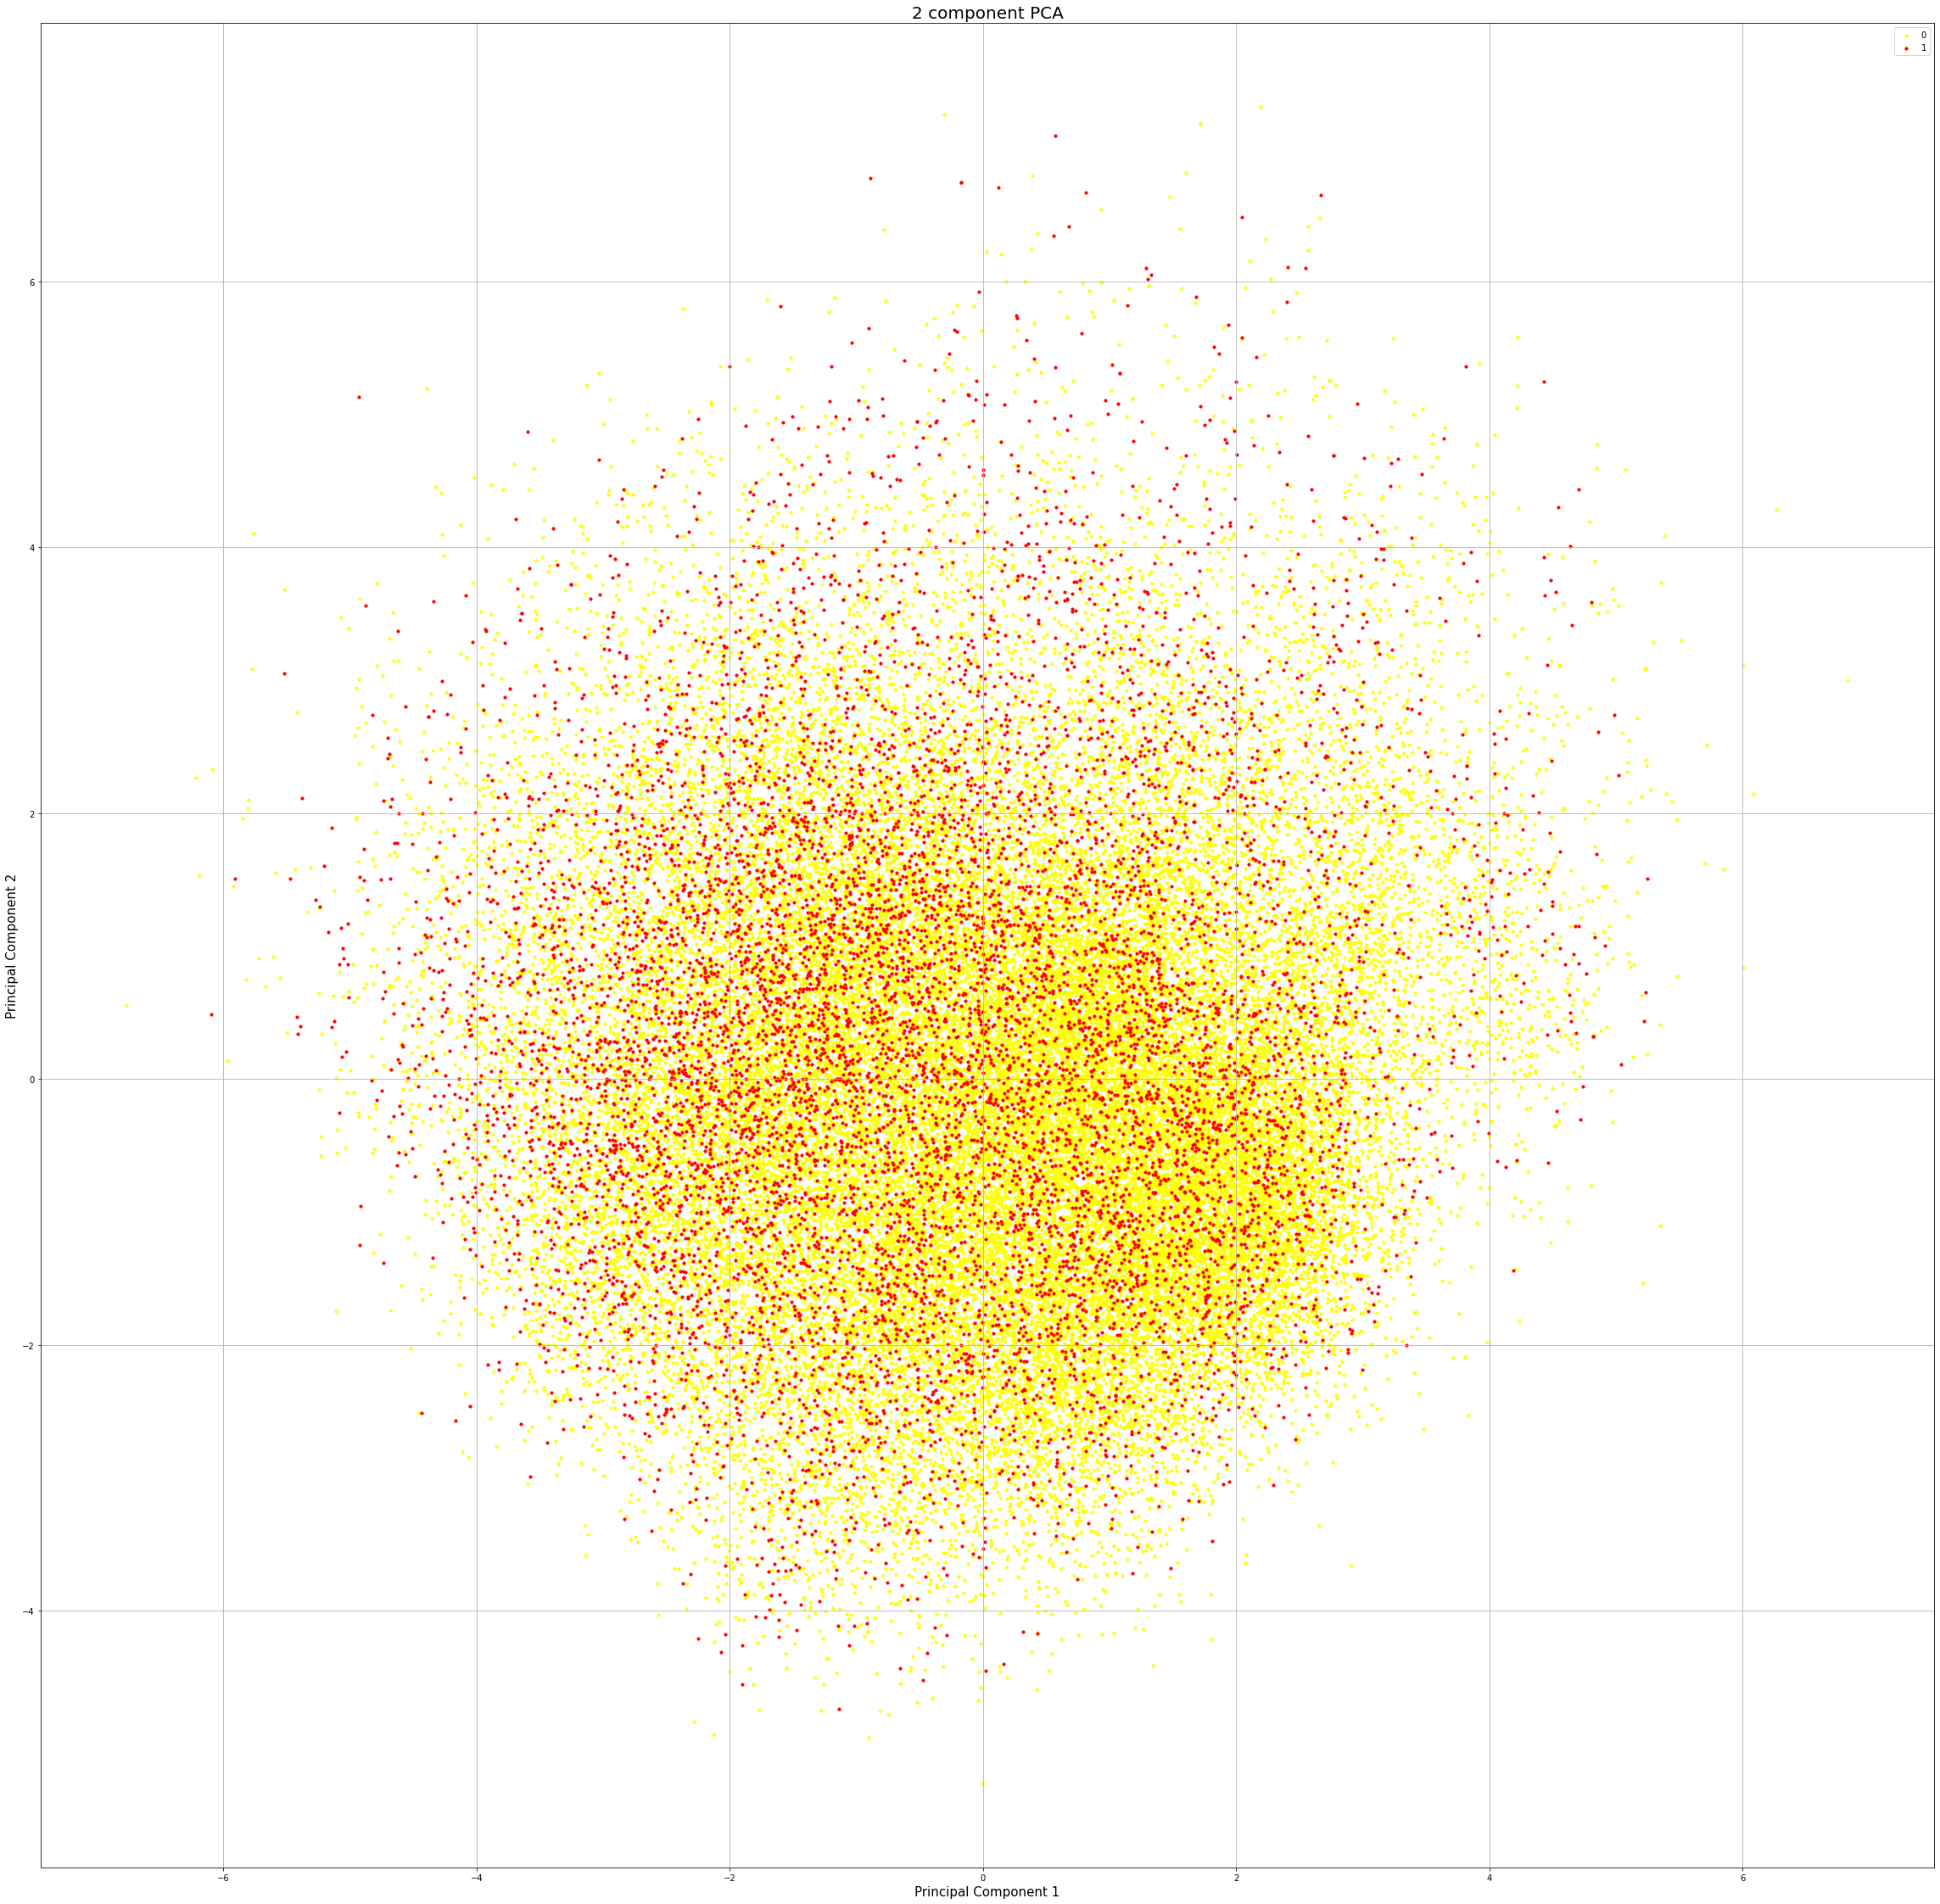

In [39]:
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['yellow','r']
for target, color in zip(targets,colors):
    indicesToKeep = pca_dataframe['casualty_severity'] == target
    ax.scatter(pca_dataframe.loc[indicesToKeep, 'principal component 1']
               , pca_dataframe.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

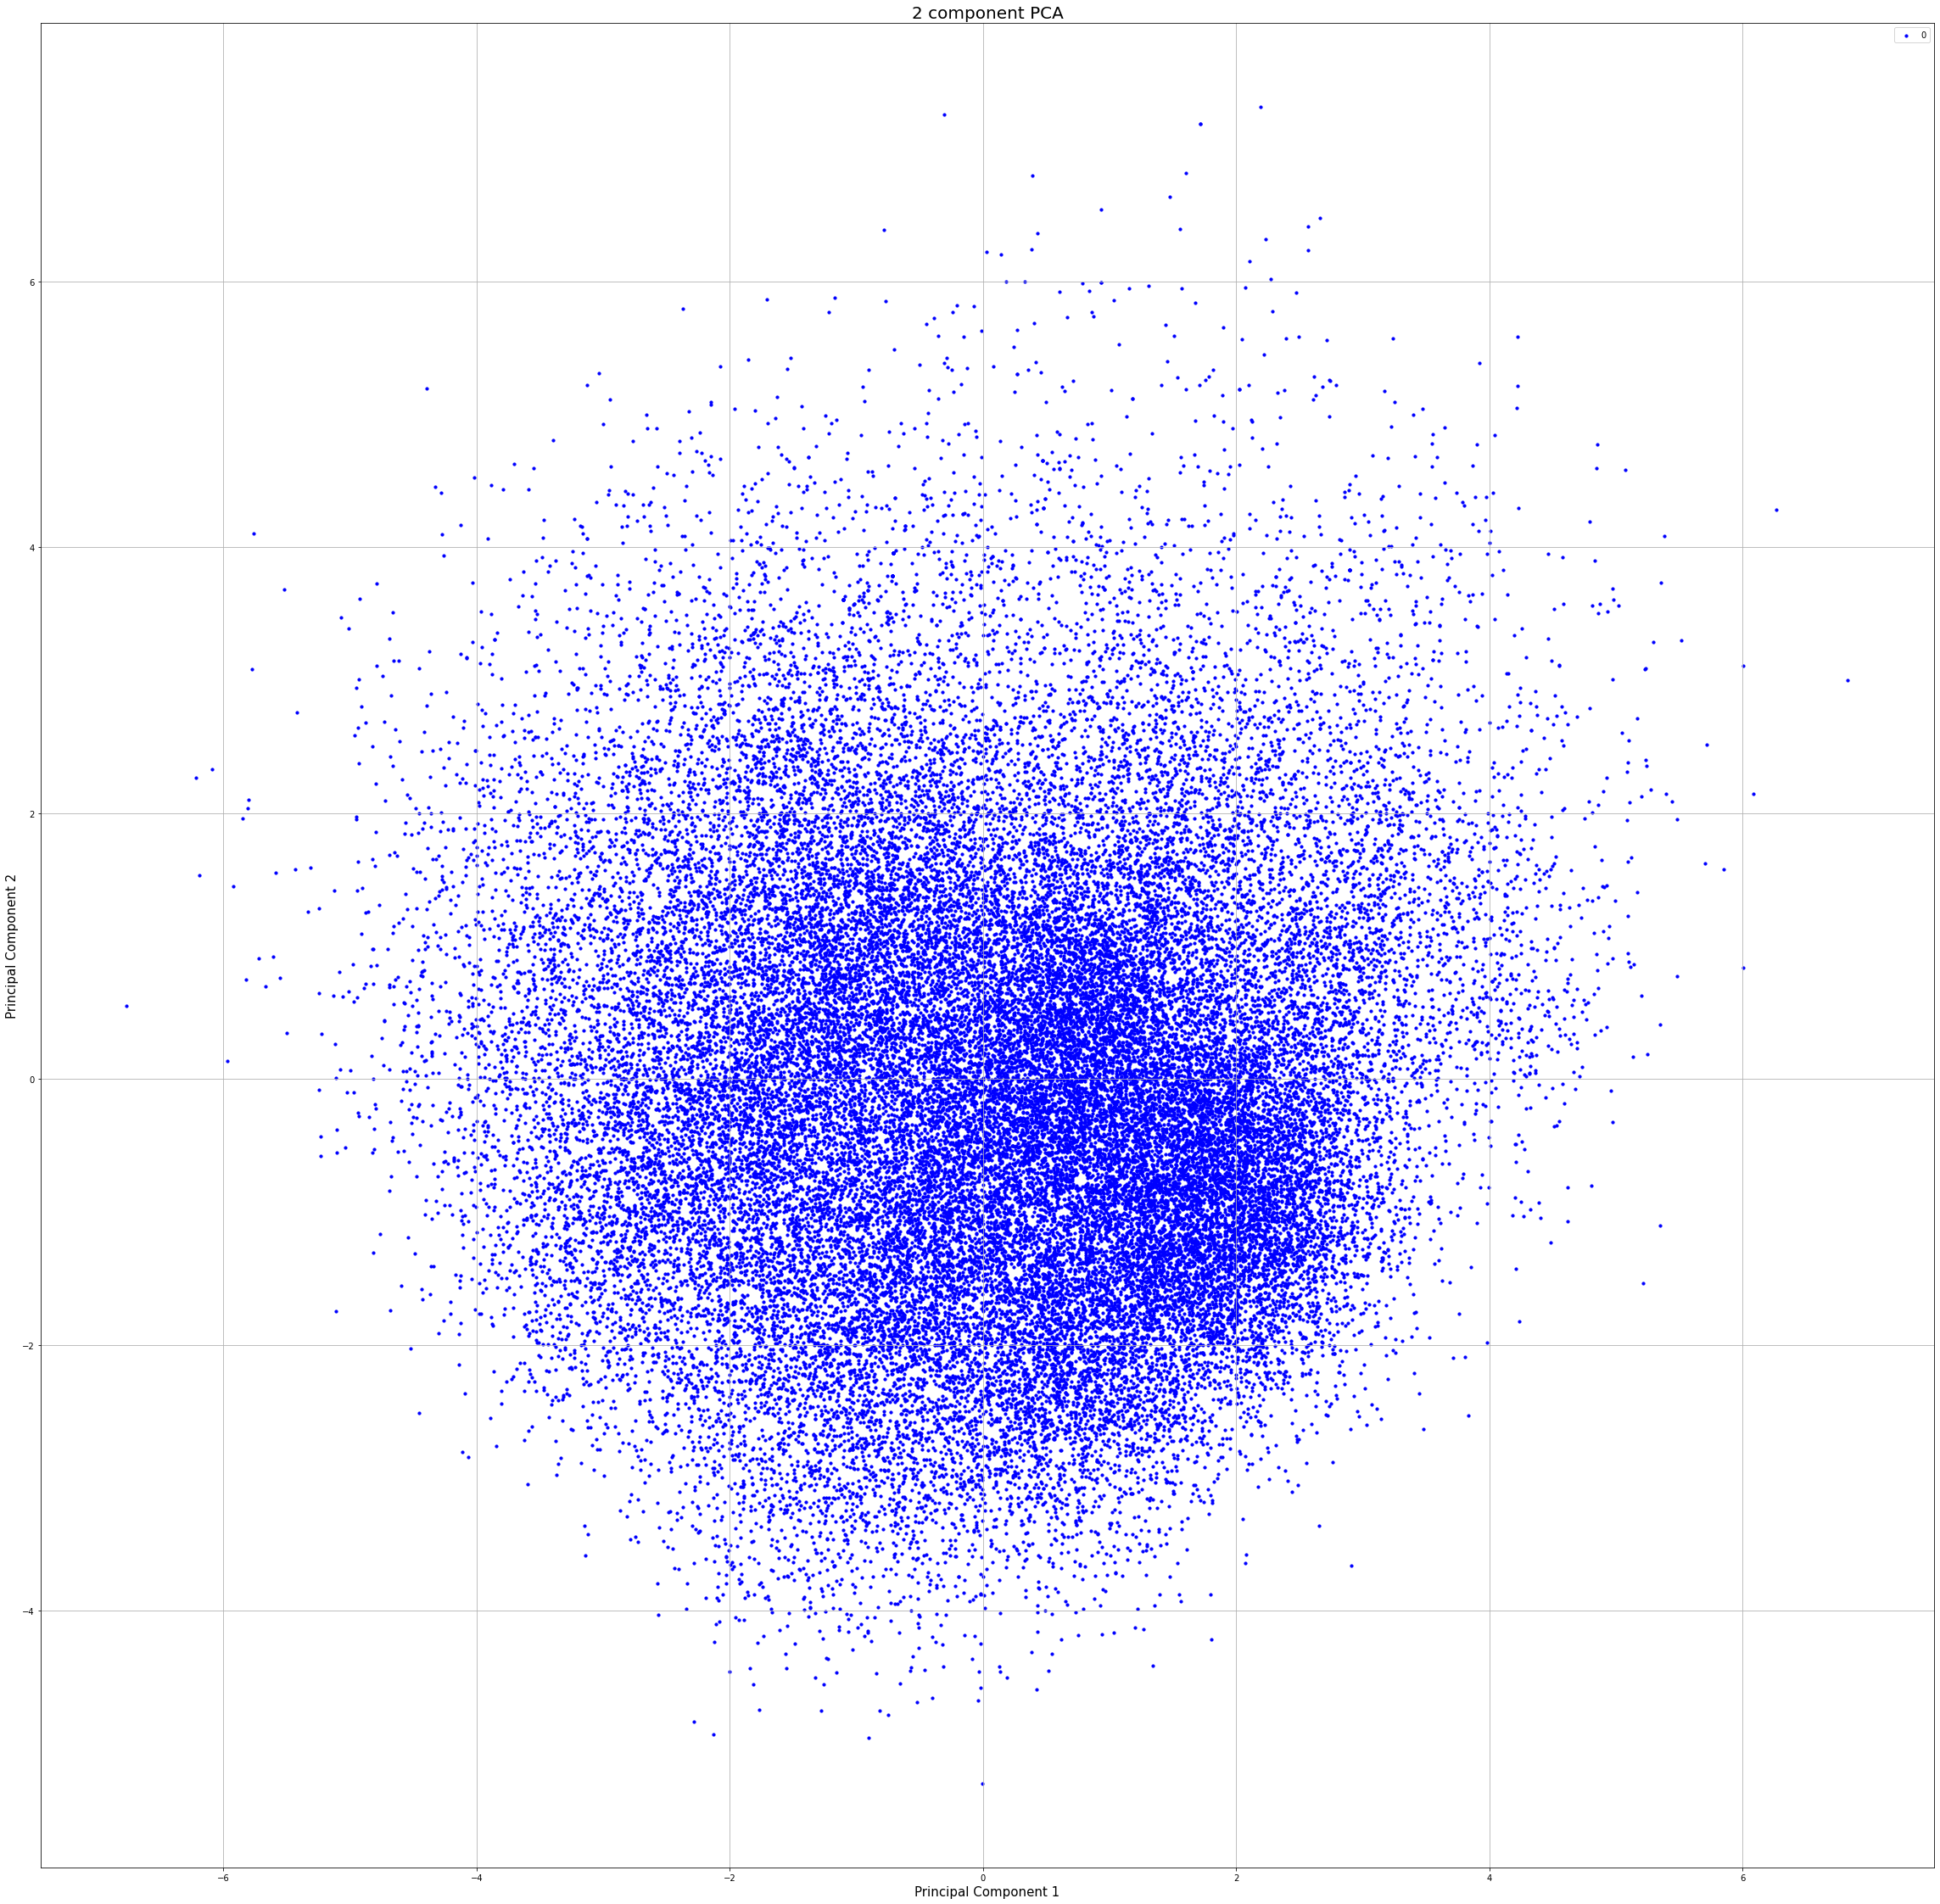

In [40]:
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0]
colors = ['b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_dataframe['casualty_severity'] == target
    ax.scatter(pca_dataframe.loc[indicesToKeep, 'principal component 1']
               , pca_dataframe.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

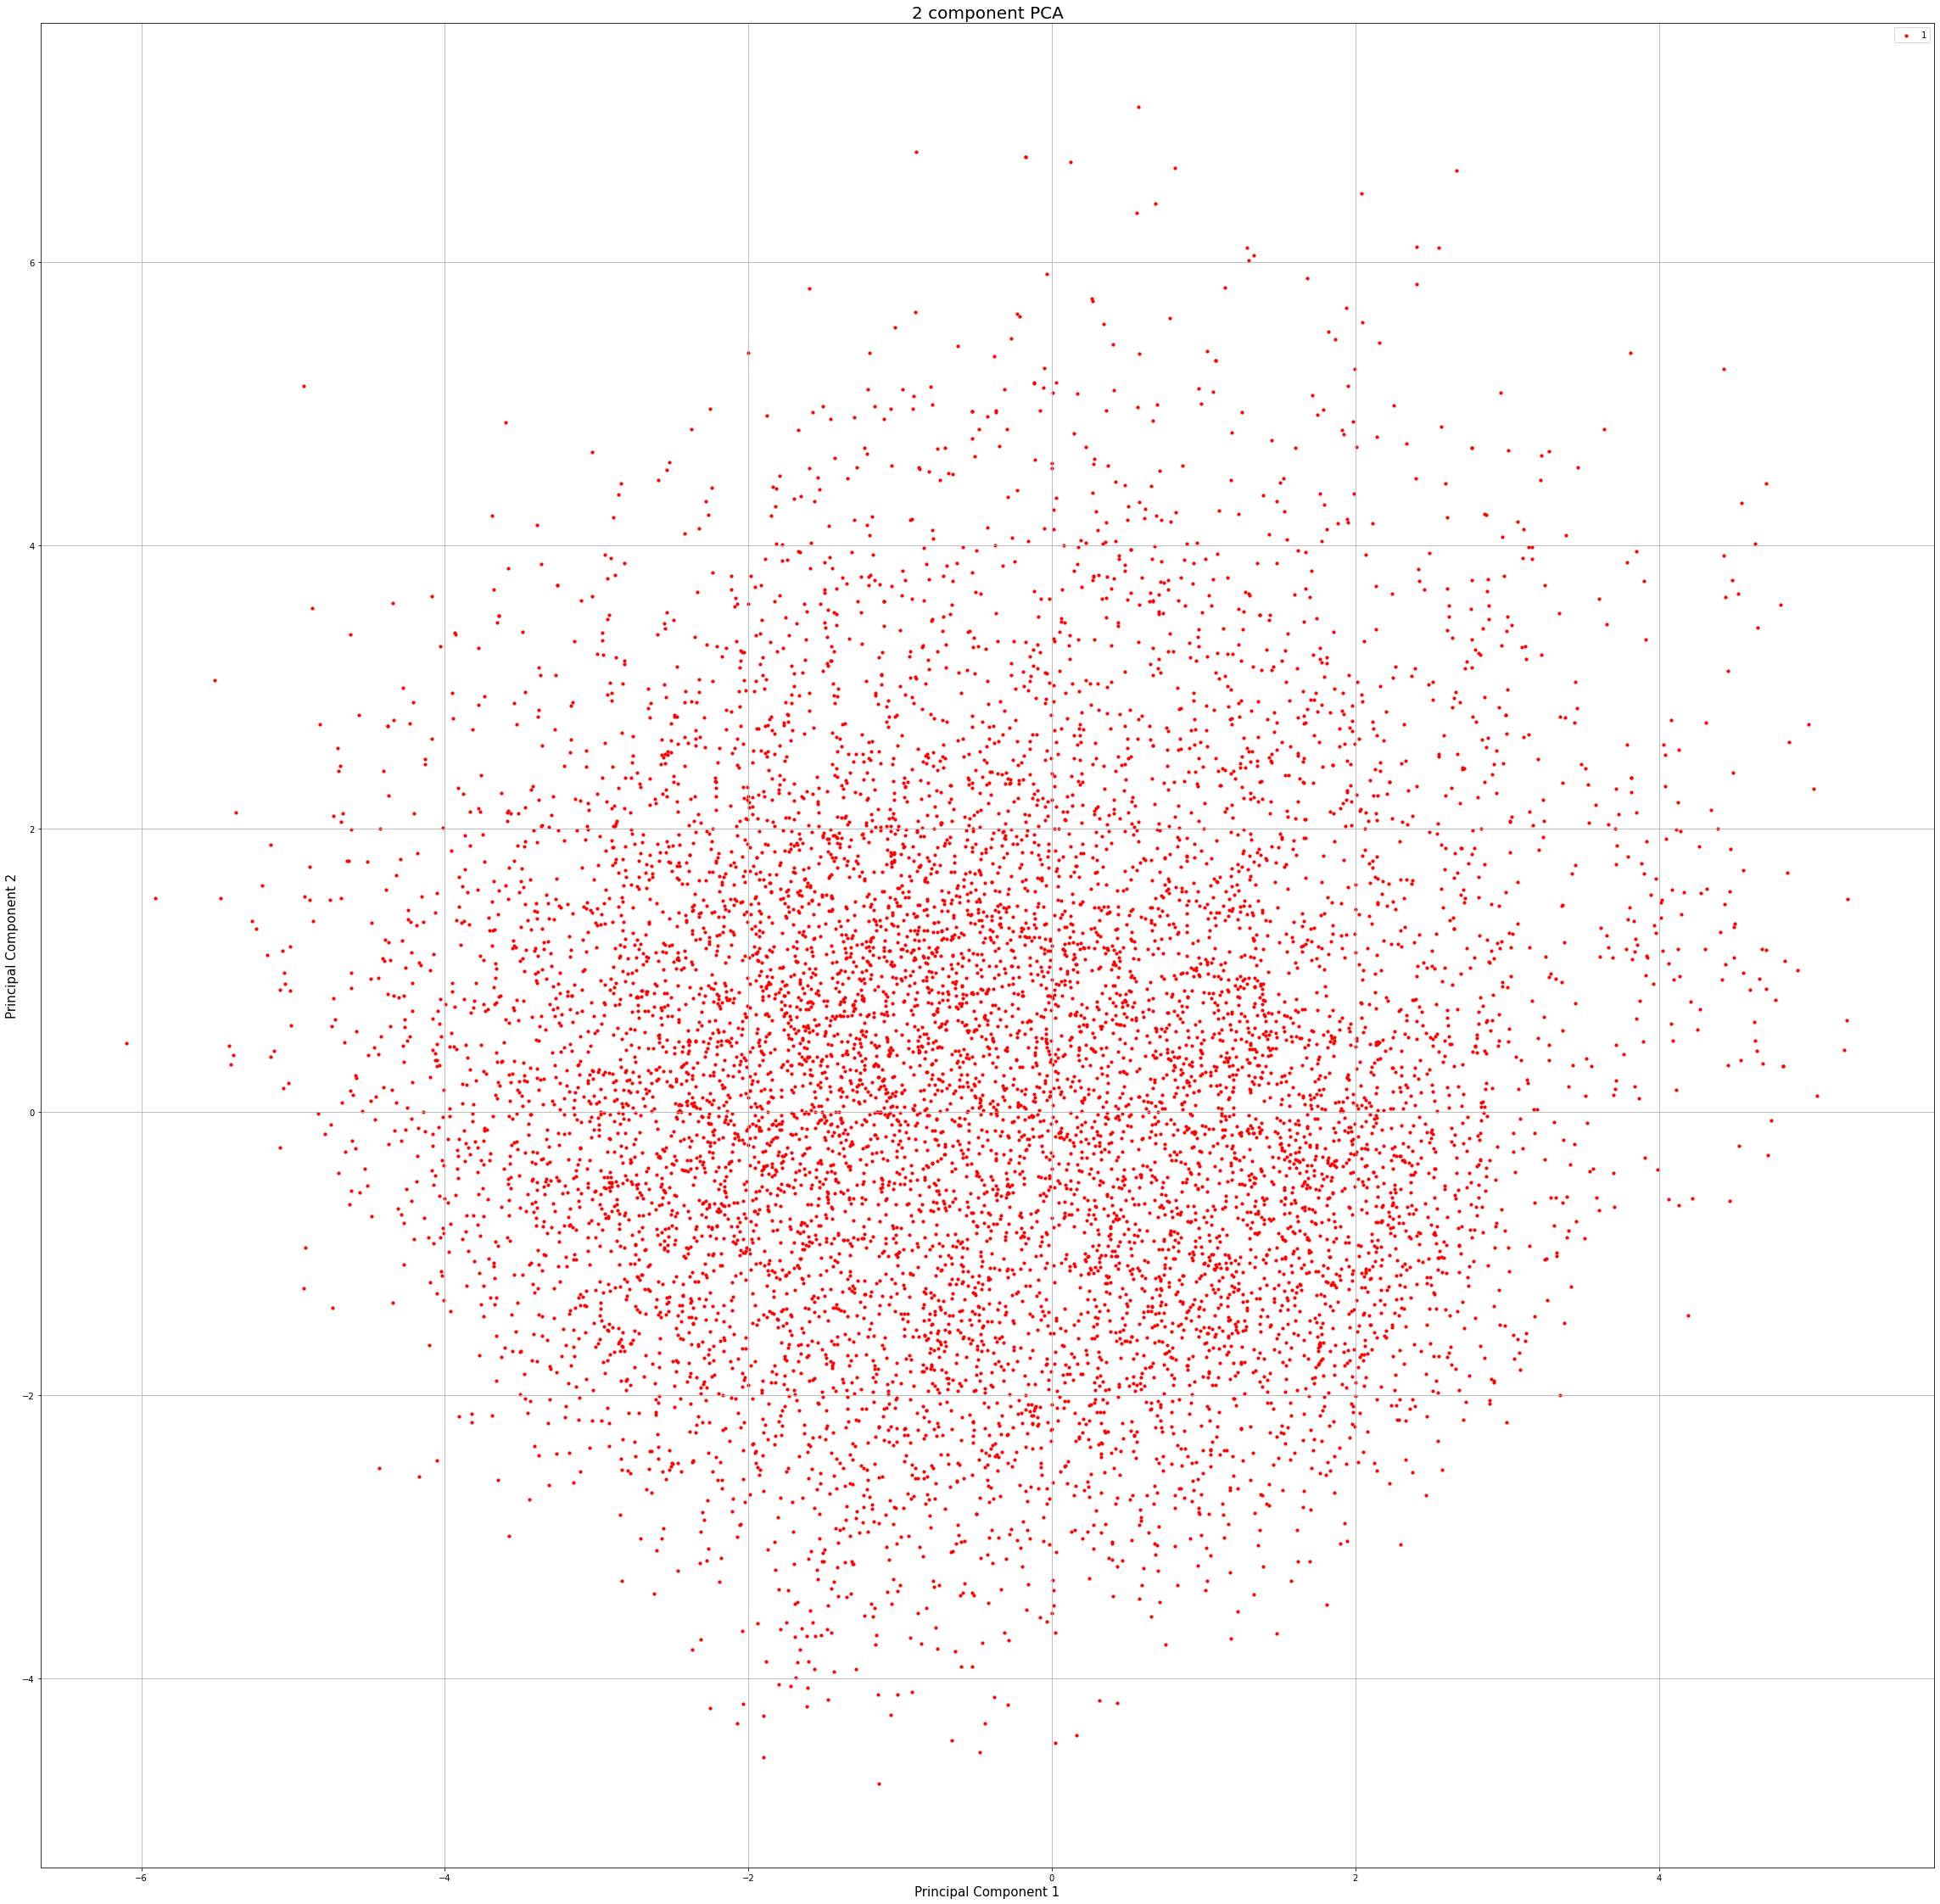

In [41]:
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1]
colors = ['red']
for target, color in zip(targets,colors):
    indicesToKeep = pca_dataframe['casualty_severity'] == target
    ax.scatter(pca_dataframe.loc[indicesToKeep, 'principal component 1']
               , pca_dataframe.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [42]:
pca = PCA()
princ_components = pca.fit_transform(pca_x)

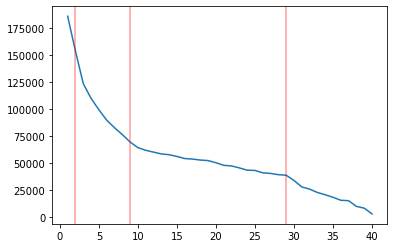

In [43]:
# Scree Plot

plt.plot(range(1, len(pca.singular_values_) +1), pca.singular_values_**2)
plt.axvline(9, color = "red", alpha = 0.4)
plt.axvline(2, color = "red", alpha = 0.4)
plt.axvline(29, color = "red", alpha = 0.4)

plt.show()

In [49]:
#princ_components = pca.fit_transform(pca_x)

parameters_dt = {
    'sampler' : [undersampler, oversampler, smotesampler],
    'estimator__penalty' : ['l2'],
    'estimator__C' :[0.001,0.01,0.1,1,100,1000],
    'estimator__max_iter' :[100,1000,2000],
    'preprocessor__n_components': [2,9,20,29,40]
}

dt_classy = weight_estimator
pipe.set_params(Imputer = None)
pipe.set_params(preprocessor = pca)
pipe.set_params(estimator = weight_estimator)
# create the grid search instance
logreg_estimator = GridSearchCV(pipe, parameters_dt, scoring=scorer, cv=cv, verbose = 3, refit = "fbeta", n_jobs=-1)
logreg_estimator.fit(pca_x, y_train_grouped)
print(logreg_estimator.best_params_)
print(logreg_estimator.best_score_)
pd.DataFrame(logreg_estimator.cv_results_)

Fitting 4 folds for each of 270 candidates, totalling 1080 fits
{'estimator__C': 100, 'estimator__max_iter': 100, 'estimator__penalty': 'l2', 'preprocessor__n_components': 40, 'sampler': RandomUnderSampler(random_state=42)}
0.5234764467153323


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__max_iter,param_estimator__penalty,param_preprocessor__n_components,param_sampler,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta
0,0.568134,0.021994,0.048509,0.008563,0.001,100,l2,2,RandomUnderSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",...,0.317501,0.001997,253,0.430499,0.429372,0.426305,0.429941,0.429029,0.001622,253
1,0.596389,0.028723,0.041758,0.008229,0.001,100,l2,2,RandomOverSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",...,0.317881,0.002080,222,0.431348,0.429364,0.426123,0.431313,0.429537,0.002128,226
2,0.699158,0.021303,0.037258,0.002863,0.001,100,l2,2,SMOTE(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",...,0.317834,0.002570,234,0.430424,0.428385,0.426354,0.432543,0.429427,0.002304,243
3,0.687902,0.031727,0.037260,0.006263,0.001,100,l2,9,RandomUnderSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",...,0.373836,0.006990,164,0.502225,0.505980,0.492588,0.482211,0.495751,0.009218,183
4,0.822185,0.104075,0.042258,0.010988,0.001,100,l2,9,RandomOverSampler(random_state=42),"{'estimator__C': 0.001, 'estimator__max_iter':...",...,0.372199,0.007472,184,0.504627,0.506338,0.492859,0.481759,0.496395,0.009916,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.995702,0.155878,0.072266,0.010037,1000,2000,l2,29,RandomOverSampler(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",...,0.387913,0.004829,58,0.523267,0.517912,0.520679,0.502731,0.516148,0.007974,58
266,4.661549,0.031037,0.026755,0.003767,1000,2000,l2,29,SMOTE(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",...,0.384557,0.003759,99,0.517920,0.511589,0.514439,0.502219,0.511542,0.005831,99
267,0.820937,0.064781,0.066764,0.007824,1000,2000,l2,40,RandomUnderSampler(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",...,0.392945,0.005466,1,0.534842,0.521181,0.525719,0.512164,0.523476,0.008177,1
268,1.770145,0.104276,0.065764,0.012972,1000,2000,l2,40,RandomOverSampler(random_state=42),"{'estimator__C': 1000, 'estimator__max_iter': ...",...,0.391796,0.004042,28,0.531136,0.521435,0.522528,0.510686,0.521446,0.007260,22


In [50]:
print("Performance on Train Data:")
logreg_pred_train = logreg_estimator.best_estimator_.predict(pca_x)

print(classification_report(y_train_grouped, logreg_pred_train))
print("F-Beta Score: ", fBetaScorer(y_train_grouped, logreg_pred_train),"\n")
pca_x_test = scaler.transform(X_test_grouped)
#pca_x_test = pca.transform(pca_x_test)
logreg_pred_test = logreg_estimator.best_estimator_.predict(pca_x_test)
print("Performance on Test Data:")
print(classification_report(y_test_grouped, logreg_pred_test))
print("F-Beta Score: ", fBetaScorer(y_test_grouped, logreg_pred_test))

Performance on Train Data:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     45657
           1       0.28      0.68      0.39      9301

    accuracy                           0.65     54958
   macro avg       0.59      0.66      0.57     54958
weighted avg       0.80      0.65      0.69     54958

F-Beta Score:  0.5244965434325217 

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74     11549
           1       0.26      0.66      0.38      2298

    accuracy                           0.64     13847
   macro avg       0.58      0.65      0.56     13847
weighted avg       0.80      0.64      0.68     13847

F-Beta Score:  0.5053583389149364


In [53]:
importances = list(zip(range(1,41),logreg_estimator.best_estimator_.get_params()['steps'][-1][1].coef_[0]))
importances.sort(key = lambda x:x[1], reverse=True)
for i in importances[:]:
    print(i[0] , "\t\t:", i[1])

38 		: 0.1554090240348229
17 		: 0.15207703119474475
2 		: 0.13069262454903607
23 		: 0.10672371221559163
5 		: 0.08746253098470445
14 		: 0.08329683894905074
16 		: 0.08146927177024837
28 		: 0.07021790814246248
15 		: 0.07020260253757238
29 		: 0.06395197145701584
34 		: 0.045985260384909535
19 		: 0.044026100729618045
12 		: 0.033205172811505236
26 		: 0.012953229227990538
39 		: 0.009846717152030835
25 		: -0.001300124739228138
40 		: -0.00621753872130639
33 		: -0.012964323004539063
6 		: -0.015923006722200272
24 		: -0.018860777186607686
10 		: -0.025297719637920168
31 		: -0.025362852358988146
35 		: -0.04161613085084194
36 		: -0.04355650321032634
13 		: -0.04970284219283529
27 		: -0.058105266493923766
18 		: -0.06924298502684062
22 		: -0.09110120715453326
37 		: -0.10037516300944069
21 		: -0.10055300339928729
32 		: -0.11558215719095023
7 		: -0.11939737327034104
9 		: -0.12419996956750234
20 		: -0.1320948980091149
30 		: -0.143310063122445
4 		: -0.1604327338977255
11 		:

In [51]:
pd.DataFrame(pca_x_test).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.049116,-0.541771,1.178436,-0.065062,-0.472403,1.551436,0.531204,-0.779188,0.589569,1.122401,...,-0.907282,-0.722598,-2.466789,-0.640500,-1.328556,-1.091802,-0.196780,-0.564246,-1.179890,-0.258151
1,-0.049116,-0.541771,1.178436,-1.078003,0.444450,0.575095,-3.758590,-1.434994,1.475885,1.122401,...,-0.907282,-0.722598,-0.687996,1.336174,-0.837205,-1.091802,-0.196780,-0.249649,0.745314,-0.258151
2,-0.049116,-0.541771,1.178436,-1.078003,1.193427,1.063266,0.531204,-1.434994,0.589569,0.277576,...,-0.389645,-0.365734,-0.687996,-0.640500,0.145497,-1.091802,-0.196780,-1.193439,0.103579,-0.258151
3,-1.349354,-0.541771,1.178436,-1.078003,1.593743,0.575095,-2.532935,-0.123382,-0.296748,1.122401,...,-0.389645,-0.365734,-0.687996,-0.640500,-1.328556,-1.197121,-1.794928,-1.350738,0.424446,-0.258151
4,-1.349354,-0.541771,1.178436,-0.571532,0.689804,1.551436,-1.920107,-1.434994,-1.183064,1.122401,...,-0.389645,-0.365734,-1.577393,-0.640500,0.636849,4.404006,0.602293,0.536843,0.424446,-0.258151


In [52]:
pd.DataFrame(pca_x).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.049116,-0.541771,1.178436,-1.078003,1.174057,1.551436,0.531204,-1.434994,-0.739906,-0.989662,...,-0.389645,-0.365734,1.090796,-0.6405,-0.837205,-1.101832,-0.196780,-0.564246,-1.821624,-2.491873
1,-0.049116,-0.541771,1.178436,-1.078003,1.015868,0.575095,-1.920107,-1.434994,0.589569,0.277576,...,-0.389645,-0.365734,0.201400,-0.6405,0.145497,-1.091802,-0.196780,-1.193439,-0.538155,-0.258151
2,-0.049116,-0.541771,1.178436,-1.078003,0.957758,1.551436,0.531204,-0.779188,-0.739906,-0.989662,...,-0.389645,-0.365734,1.980192,-0.6405,0.145497,-1.092638,-0.196780,-0.092350,0.424446,-0.258151
3,-0.049116,-0.541771,1.178436,-1.078003,0.366969,-1.377585,0.531204,-0.779188,0.589569,1.122401,...,-0.389645,-0.365734,1.090796,-0.6405,-0.345854,-0.362092,-0.196780,-0.721544,-0.859022,-0.258151
4,-0.049116,-0.541771,1.178436,-1.078003,0.860907,1.551436,-3.758590,-0.779188,-0.739906,-0.989662,...,-0.389645,-0.365734,-0.687996,-0.6405,0.145497,-1.197121,-1.794928,-1.350738,-1.821624,-2.491873
